In [1]:
from ipywidgets import widgets, Layout
import os
from yellowbrick.regressor import CooksDistance
import warnings
from plotly.subplots import make_subplots
import datetime
import statsmodels.api as sm
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import plotly.io as pio
import plotly.express as px
# renderer for jupyter notebook
pio.renderers.default = 'notebook'
# renderer for vs code
# pio.renderers.default='vscode'
# renderer for colab
# pio.renderers.default='colab'
pio.templates.default = "plotly_white"
warnings.simplefilter(action='ignore')

/home/sb/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
base_path = '../viz/'

In [3]:
rain = pd.read_csv(r'../data/processedfiles/rainfall-by-region.csv')
regions = list(rain.columns.values)[5:]
years = list(rain['year'].unique())
monsoon_list = [i for i in range(150, 281)]
rain_monsoon = rain[rain['day-number'].isin(monsoon_list)]

In [4]:
rain = rain.set_index('date', drop=False)

In [5]:
fig = go.Figure()

In [6]:
def initial_plot(fig, x_axis, region, df, iterate_list, title, x_axis_title, path, add_path=''):
    #     list_type=year
    path = create_dir(path, region)
    if len(iterate_list) == 0:
        trace = ''
        trace = go.Scatter(x=df[x_axis], y=df[region], name=region, line=dict(
            color='black', width=2, dash='dot'))
        layout = go.Layout(title=dict(text=title+'-'+region), xaxis=dict(title=x_axis_title, rangeslider=dict(
            visible=False)), yaxis=dict(title='Rainfall (mm)'), legend=dict(orientation="h"))
        fig.add_trace(trace)
        fig.update_layout(layout)
        fig.write_image(path+add_path+'.jpeg')
        fig.data = []
        fig.layout = {}
    else:
        df = df[[region, 'year', 'month', 'day-of-month', 'day-number']]
        for i in iterate_list:
            trace = ''
            temp = df[df['year'] == i]
            if not temp[region].isnull().all():
                trace = go.Scatter(x=temp[x_axis], y=temp[region], name=str(
                    i), line=dict(color='black', width=2, dash='dot'))
                layout = go.Layout(title=dict(text=title+'-'+region+'-'+str(i)), xaxis=dict(title=x_axis_title, rangeslider=dict(visible=False)), yaxis=dict(title='Rainfall (mm)'), legend=dict(
                    orientation="h"))
                fig.add_trace(trace)
                fig.update_layout(layout)
                if add_path=='':
                    fig.write_image(path+str(i)+'.jpeg')
                else:
                    fig.write_image(path+add_path+'-'+str(i)+'.jpeg')
                fig.data = []
                fig.layout = {}

In [5]:
def create_dir(base, new_dir):
    path = base+new_dir+'/'
    if not os.path.exists(path):
        os.mkdir(path)
    return path

In [8]:
path = create_dir(
    base_path, 'rain-observed-in-all-classification-daily-basis-monsoon')
for i in regions:
    initial_plot(fig, 'day-number', i, rain_monsoon, years,
                 'Rain observed on daily basis (monsoon time)', 'Day of year', path)

In [9]:
mean_monthly_year = rain.groupby(['year', 'month'], as_index=False).mean()
median_monthly_year = rain.groupby(['year', 'month'], as_index=False).median()

In [10]:
path = create_dir(
    base_path, 'rain-observed-in-all-classification-monthly-basis-mean-median')
for i in regions:
    initial_plot(fig, 'month', i, mean_monthly_year, years,
                 'Mean rain observed on monthly basis', 'Month', path, 'mean')
    initial_plot(fig, 'month', i, median_monthly_year, years,
                 'Median rain observed on monthly basis', 'Month', path, 'median')

In [11]:
mean_yearly = rain.groupby(['year'], as_index=False).mean()
median_yearly = rain.groupby(['year'], as_index=False).median()

In [12]:
path = create_dir(
    base_path, 'rain-observed-in-all-classification-yearly-basis-mean-median')
for i in regions:
    initial_plot(fig, 'year', i, mean_yearly, [],
                 'Mean rain observed on yearly basis', 'Year', path, 'mean')
    initial_plot(fig, 'year', i, median_yearly, [],
                 'Median rain observed on yearly basis', 'Year', path, 'median')

In [13]:
mean_daily = rain.groupby(['day-number'], as_index=False).mean()
median_daily = rain.groupby(['day-number'], as_index=False).median()

In [14]:
path = create_dir(
    base_path, 'rainfall-day-wise-distribution-in-all-classification-full-year-mean-median')
for i in regions:
    initial_plot(fig, 'day-number', i, mean_daily, [],
                 'Mean distribution of Rainfall', 'Day of year', path, 'mean')
    initial_plot(fig, 'day-number', i, median_daily, [],
                 'Median distribution of Rainfall', 'Day of year', path, 'median')

In [15]:
mean_daily_monsoon = rain_monsoon.groupby(
    ['day-number'], as_index=False).mean()
median_daily_monsoon = rain_monsoon.groupby(
    ['day-number'], as_index=False).median()

In [16]:
path = create_dir(
    base_path, 'rainfall-day-wise-distribution-in-all-classification-monsoon-time-mean-and-median')
for i in regions:
    initial_plot(fig, 'day-number', i, mean_daily_monsoon, [],
                 'Mean distribution of Rainfall (monsoon time)', 'Day of year', path, 'mean')
    initial_plot(fig, 'day-number', i, median_daily_monsoon, [],
                 'Median distribution of Rainfall (monsoon time)', 'Day of year', path, 'median')

In [6]:
dict_rain_regions = {}
dict_rain_monsoon_regions = {}

dict_rain_regions_yearly = {}
dict_rain_regions_monthly = {}
dict_rain_regions_year_monthly = {}

dict_rain_monsoon_regions_yearly = {}
dict_rain_monsoon_regions_monthly = {}
dict_rain_monsoon_regions_year_monthly = {}

for i in regions:
    dict_rain_regions[i] = rain[['year', 'day-number', 'date', 'month',
                                 'day-of-month', i]].dropna(how='any', axis=0).reset_index(drop=True)

    dict_rain_monsoon_regions[i] = rain_monsoon[['year', 'day-number',
                                                 'date', 'month', 'day-of-month', i]].dropna(how='any', axis=0).reset_index(drop=True)

    dict_rain_regions_yearly[i] = dict_rain_regions[i].groupby(
        'year', as_index=False)[i].sum()
    dict_rain_regions_monthly[i] = dict_rain_regions[i].groupby(
        'month', as_index=False)[i].sum()
    dict_rain_regions_year_monthly[i] = dict_rain_regions[i].groupby(
        ['year', 'month'], as_index=False)[i].sum()
    dict_rain_regions_year_monthly[i]['year'] = dict_rain_regions_year_monthly[i]['year'].astype(
        str)
    dict_rain_regions_year_monthly[i]['month'] = dict_rain_regions_year_monthly[i]['month'].astype(
        str)
    dict_rain_regions_year_monthly[i]['year'+'-'+'month'] = dict_rain_regions_year_monthly[i]['year'] + \
        '-'+dict_rain_regions_year_monthly[i]['month']

    dict_rain_monsoon_regions_yearly[i] = dict_rain_monsoon_regions[i].groupby(
        'year', as_index=False)[i].sum()
    dict_rain_monsoon_regions_monthly[i] = dict_rain_monsoon_regions[i].groupby(
        'month', as_index=False)[i].sum()
    dict_rain_monsoon_regions_year_monthly[i] = dict_rain_monsoon_regions[i].groupby(
        ['year', 'month'], as_index=False)[i].sum()
    dict_rain_monsoon_regions_year_monthly[i]['year'] = dict_rain_monsoon_regions_year_monthly[i]['year'].astype(
        str)
    dict_rain_monsoon_regions_year_monthly[i]['month'] = dict_rain_monsoon_regions_year_monthly[i]['month'].astype(
        str)
    dict_rain_monsoon_regions_year_monthly[i]['year'+'-'+'month'] = dict_rain_monsoon_regions_year_monthly[i]['year'] + \
        '-'+dict_rain_monsoon_regions_year_monthly[i]['month']

In [18]:
def plot_box_dot(fig, dict_df, x_axis, title1, title2, path):
    for i in regions:
        file = create_dir(path, i)
        fig.add_trace(go.Box(y=dict_df[i][i], name=i))
        fig.update_layout(title_text=title1,
                          xaxis_title='Regions', yaxis_title='Rainfall (mm)', showlegend=False)
        fig.write_image(file+x_axis+'-box.jpeg')
        fig.data = []
        fig.layout = {}
        fig.add_trace(go.Scatter(x=dict_df[i][x_axis], y=dict_df[i][i],
                                 mode='markers', name=i, line=dict(color='black', width=2)))

        fig.update_layout(title_text=title2,
                          xaxis_title=str(x_axis), yaxis_title='Rainfall (mm)', legend_orientation='h')

        fig.write_image(file+x_axis+'-dot.jpeg')
        fig.data = []
        fig.layout = {}

In [19]:
path = create_dir(base_path, 'box-dot-plot')
plot_box_dot(fig, dict_rain_regions_yearly, 'year', 'Rainfall distribution of all the regions (yearly)',
             'Year wise rainfall distribution of all the regions', path)
plot_box_dot(fig, dict_rain_regions_monthly, 'month', 'Rainfall distribution of all the regions (cumulative months)',
             'Year wise rainfall distribution of all the regions', path)
plot_box_dot(fig, dict_rain_regions_year_monthly, 'year-month', 'Rainfall distribution of all the regions (monthly)',
             'Year wise rainfall distribution of all the regions', path)

plot_box_dot(fig, dict_rain_monsoon_regions_yearly, 'year', 'Rainfall distribution of all the regions (monsoon)(yearly)',
             'Month wise rainfall distribution of all the regions (monsoon)', path)
plot_box_dot(fig, dict_rain_monsoon_regions_monthly, 'month', 'Rainfall distribution of all the regions (monsoon) (cumulative months)',
             'Cumulative month wise rainfall distribution of all the regions (monsoon)', path)
plot_box_dot(fig, dict_rain_monsoon_regions_year_monthly, 'year-month', 'Rainfall distribution of all the regions (monsoon) (monthly)',
             'Month wise rainfall distribution of all the regions (monsoon)', path)

In [7]:
def plot_cooks_distance(dict_df, title, path, monsoon=''):
    for i in regions:
        vis = CooksDistance()
        file = create_dir(path, i)
        vis.fit(dict_df[i].index.to_numpy().reshape(-1, 1), dict_df[i][i])
        if monsoon == '':
            vis.show().get_figure().savefig(file+title+'.jpeg', dpi=200, format='jpeg',
                                            transparent=True, facecolor='#ffffff', edgecolor='#ffffff')
        else:
            vis.show().get_figure().savefig(file+monsoon+'-'+title+'.jpeg', dpi=200,
                                            format='jpeg', transparent=True, facecolor='#ffffff', edgecolor='#ffffff')
        del vis

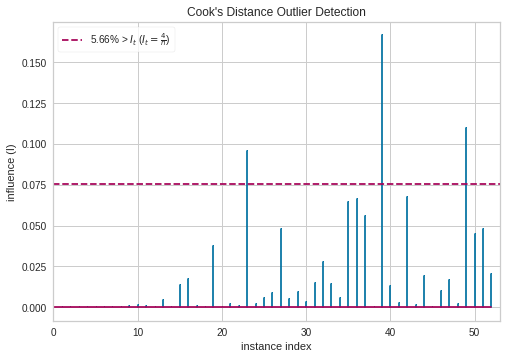

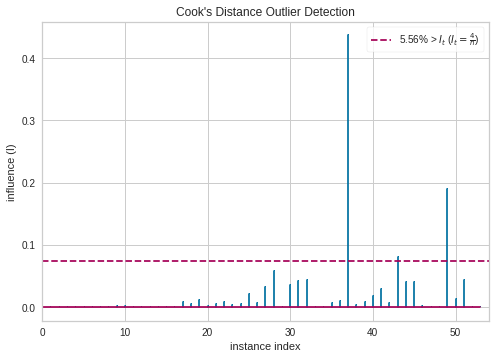

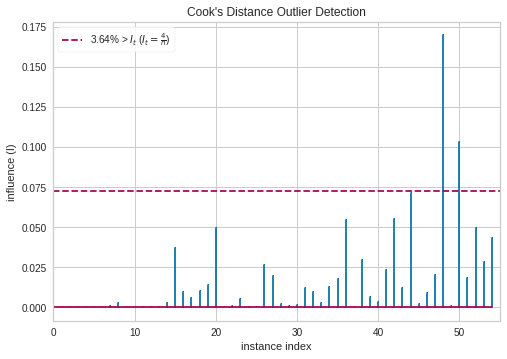

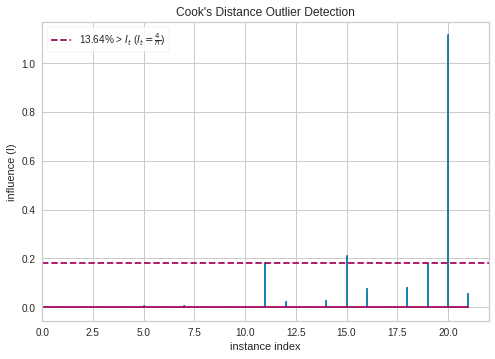

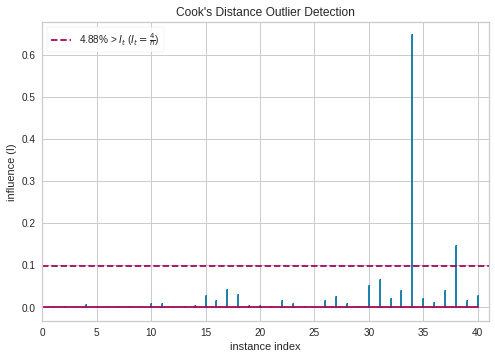

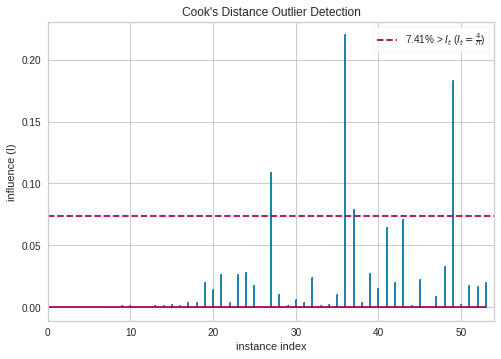

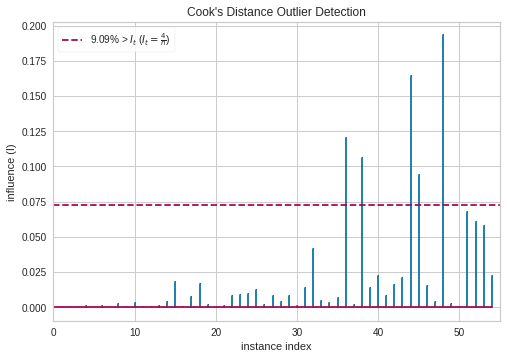

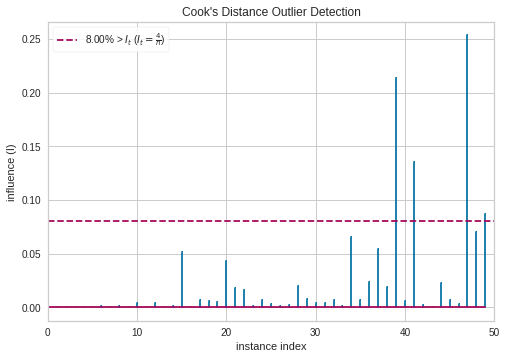

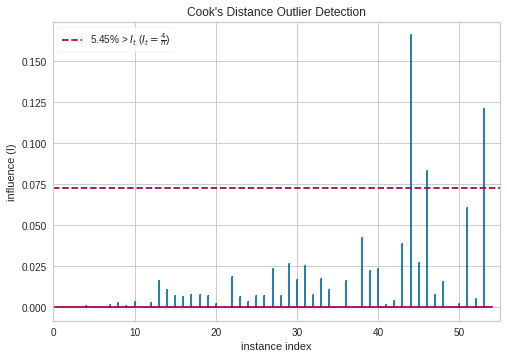

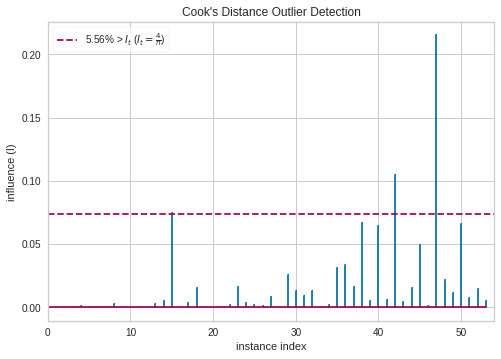

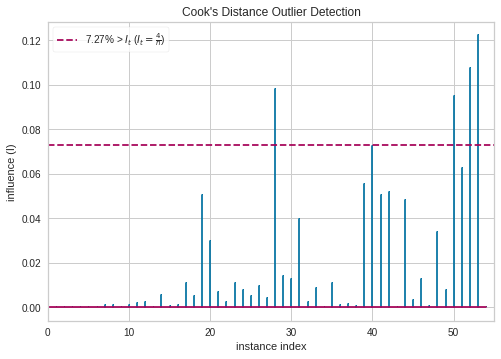

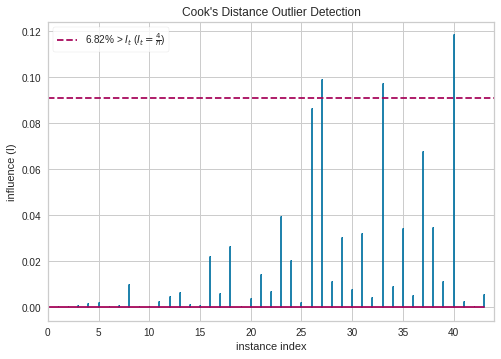

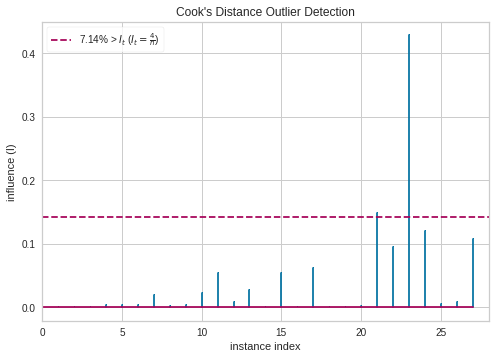

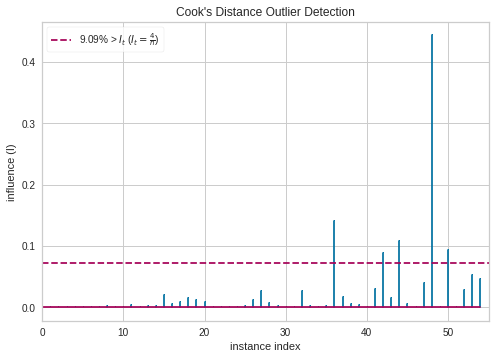

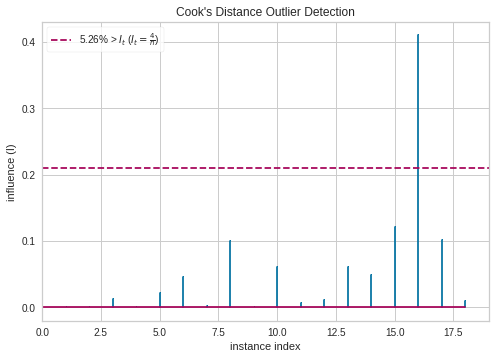

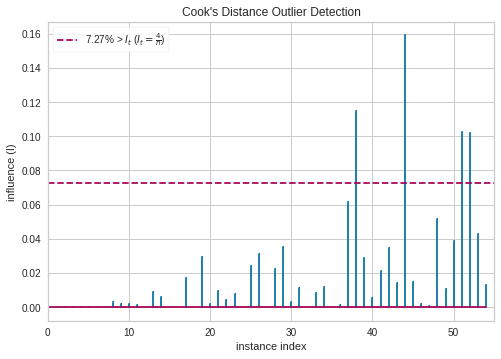

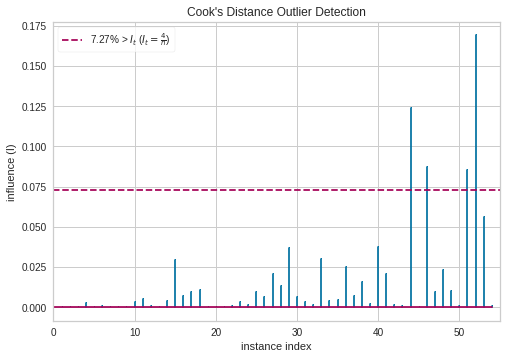

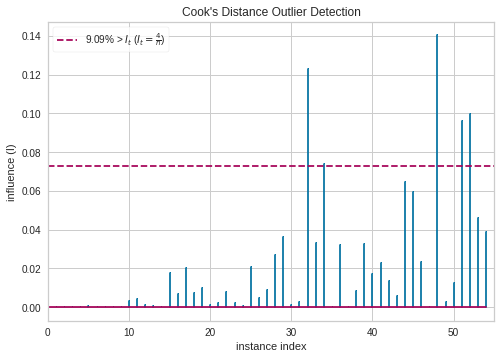

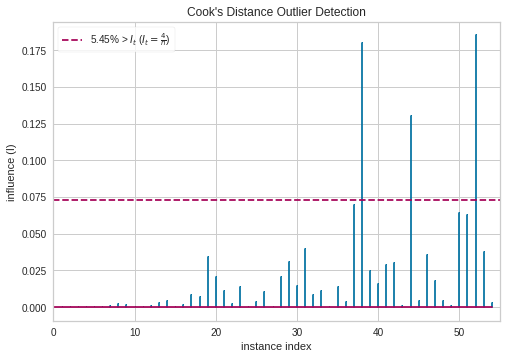

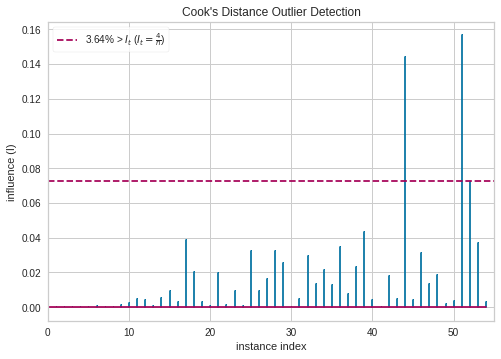

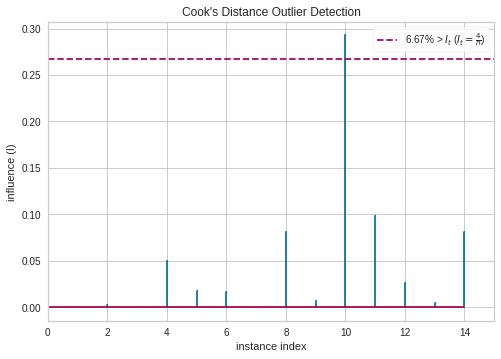

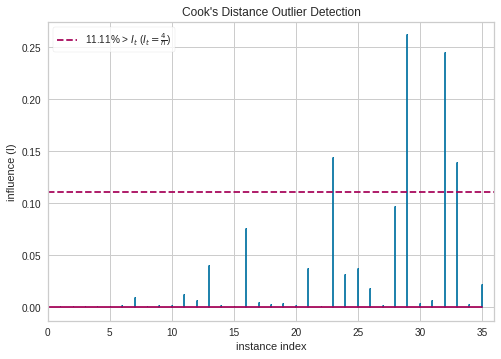

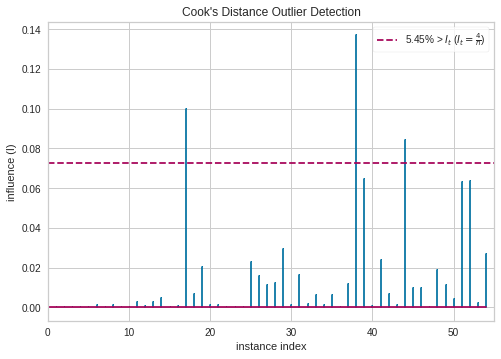

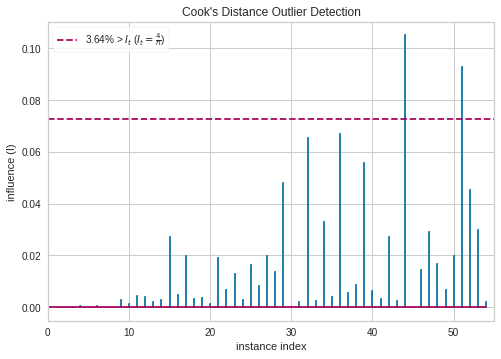

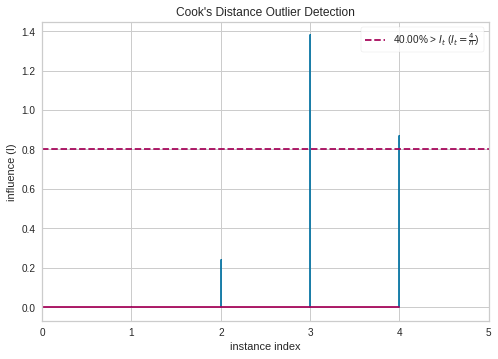

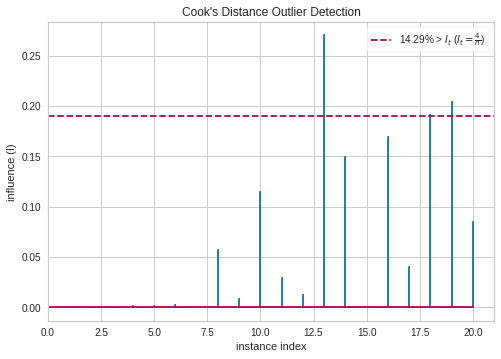

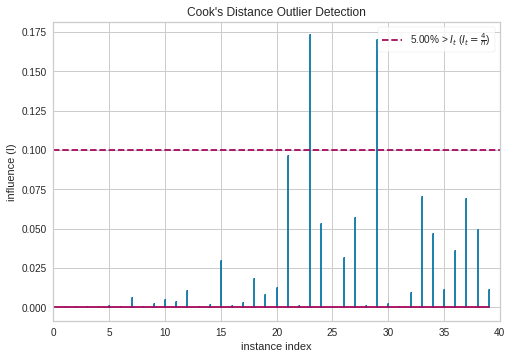

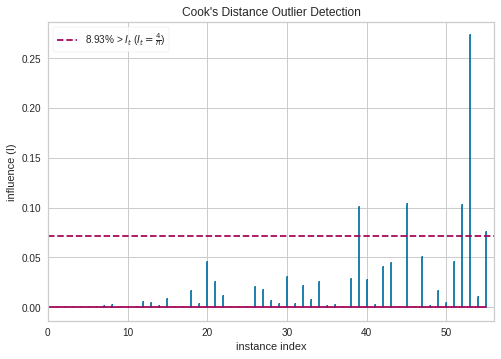

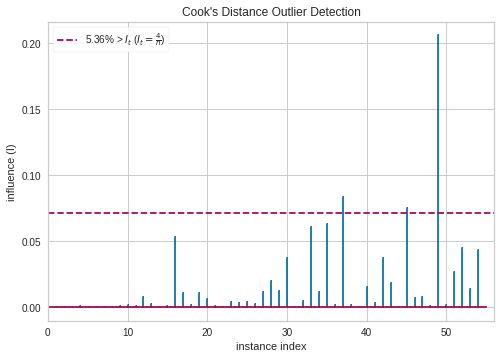

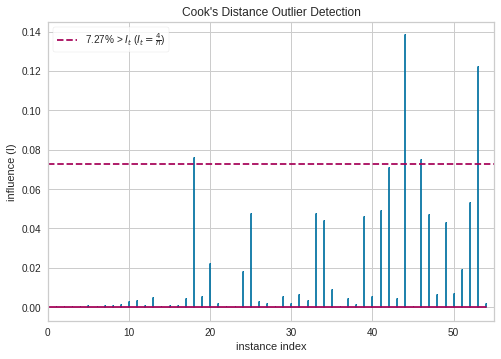

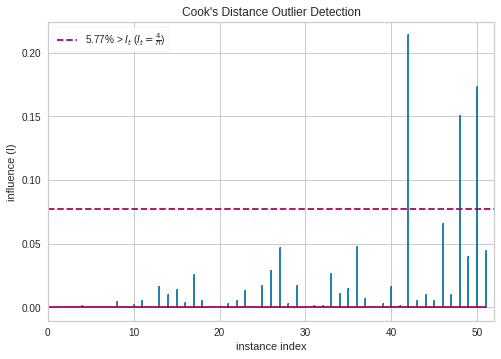

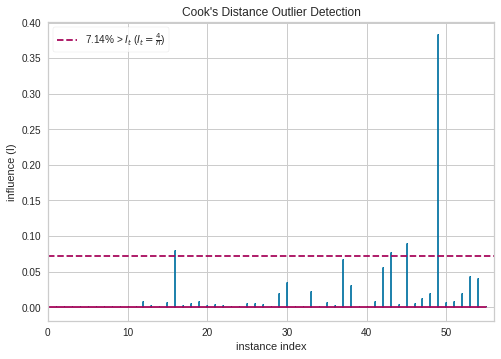

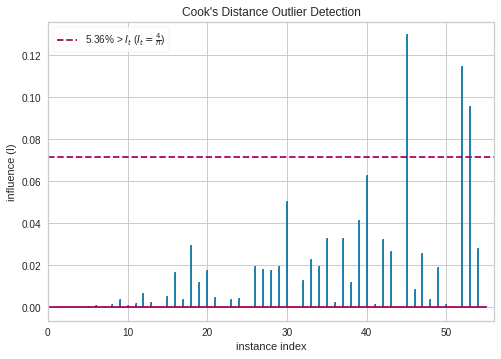

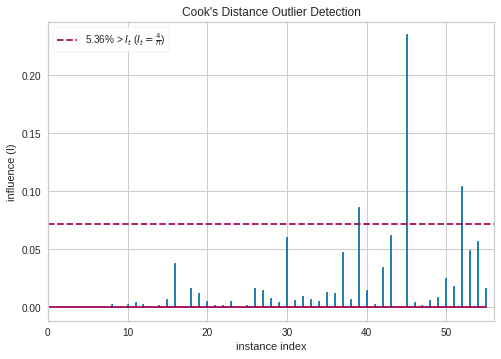

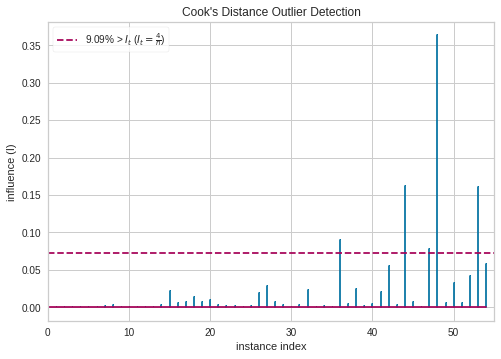

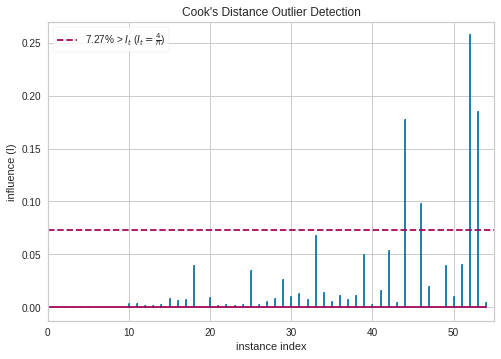

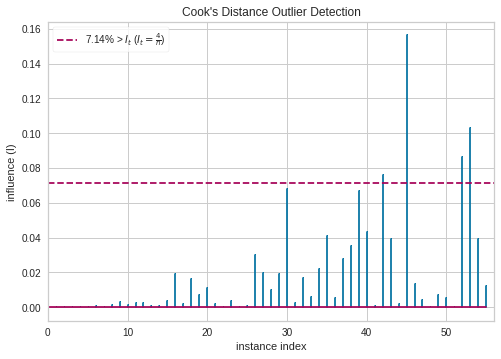

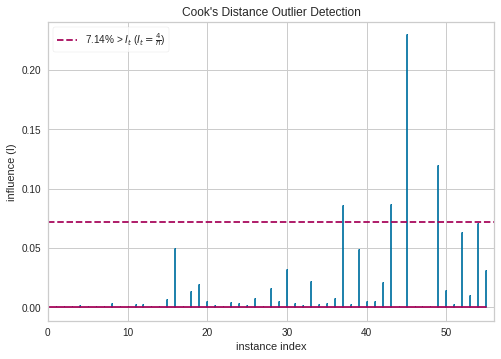

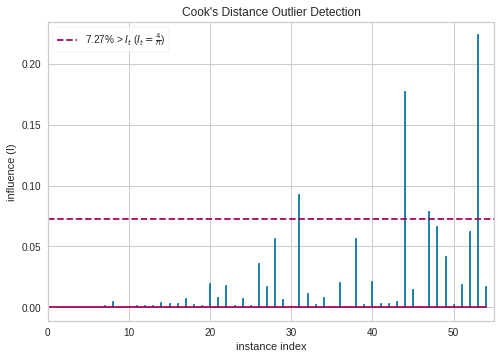

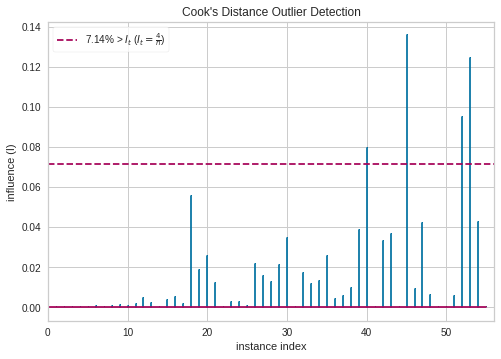

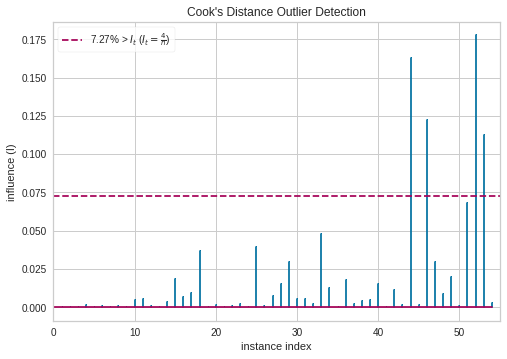

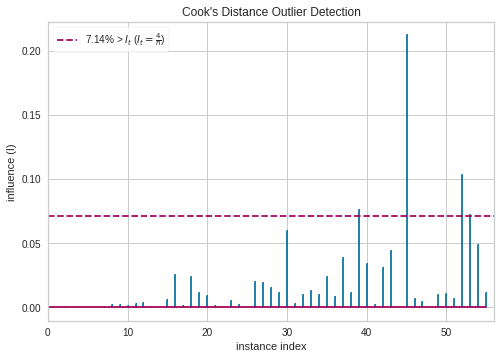

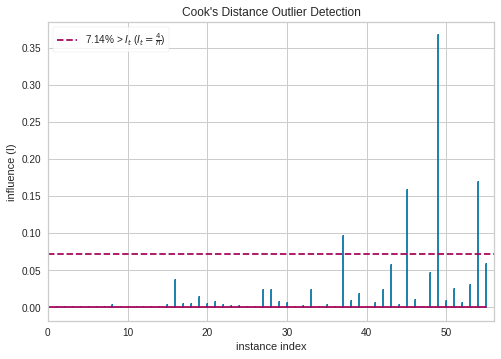

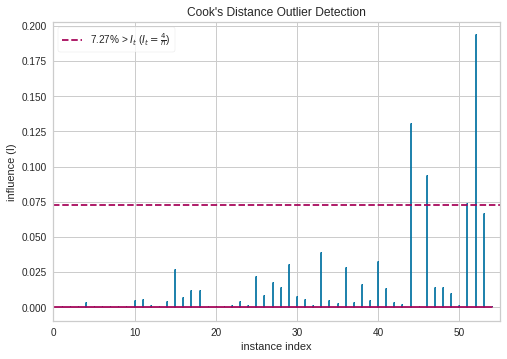

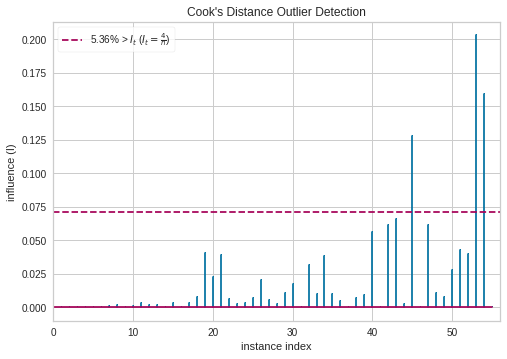

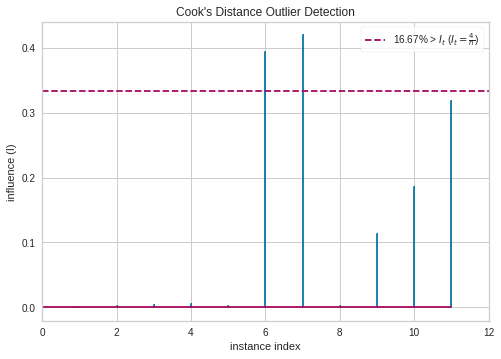

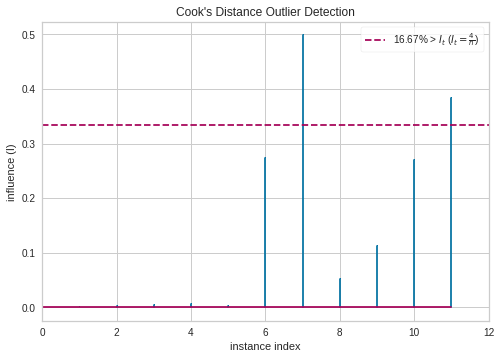

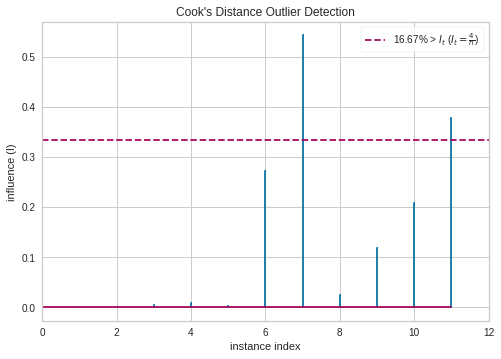

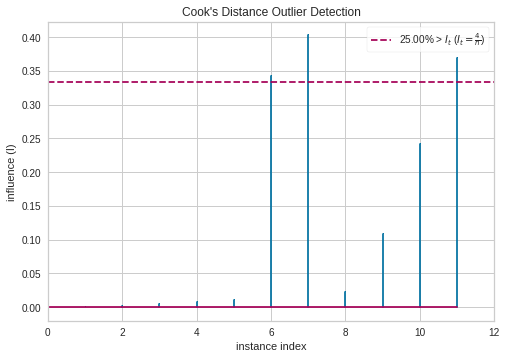

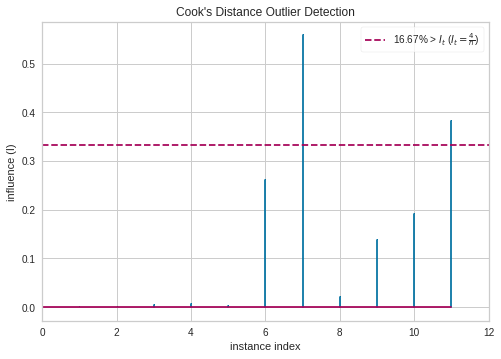

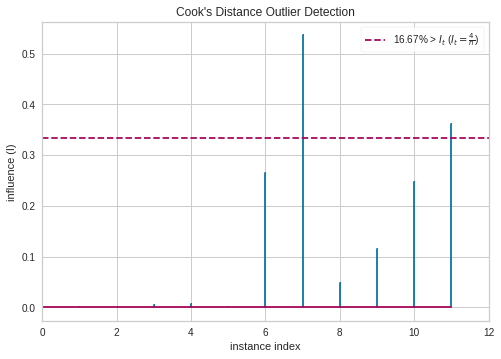

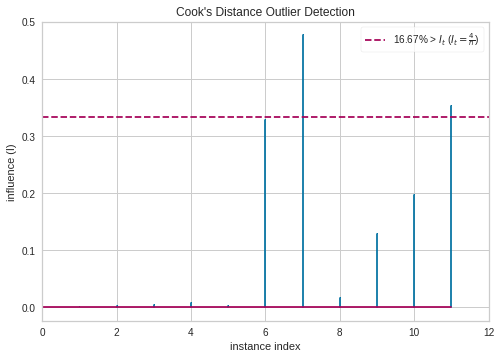

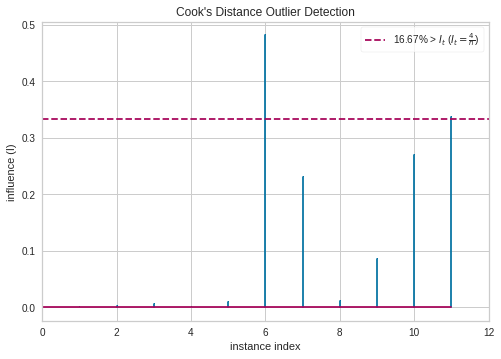

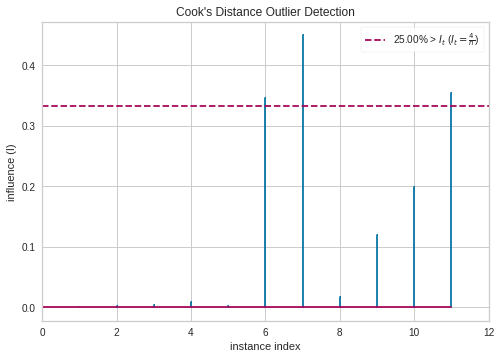

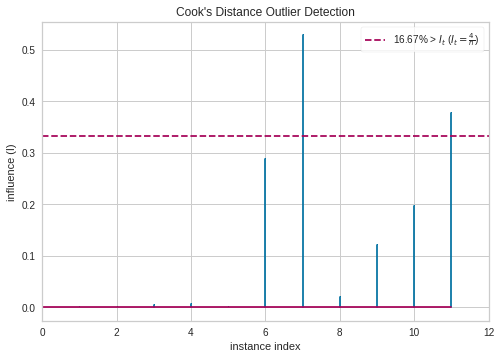

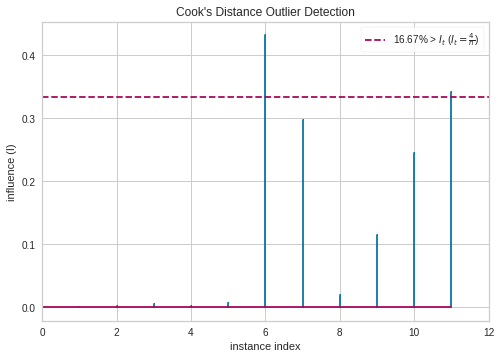

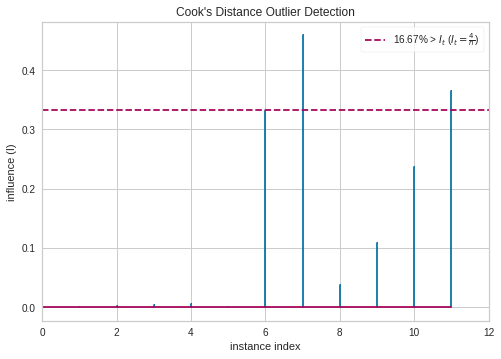

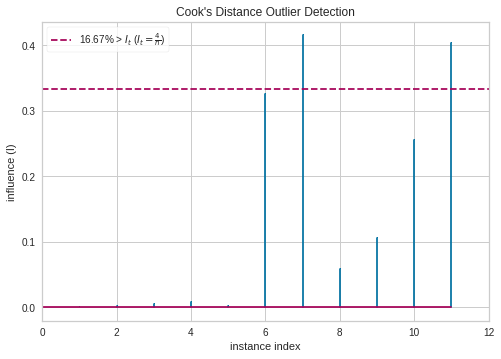

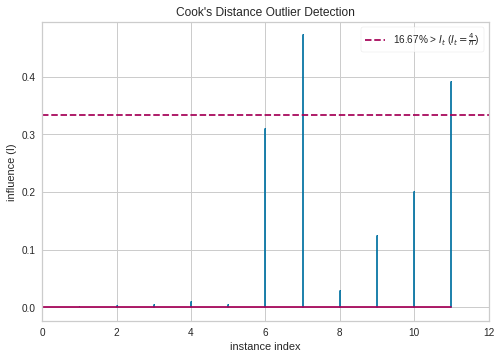

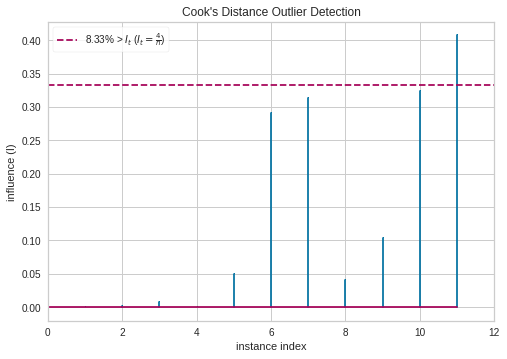

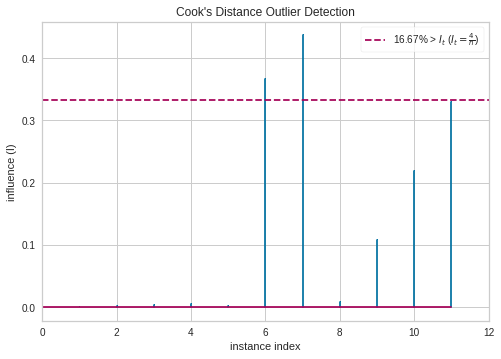

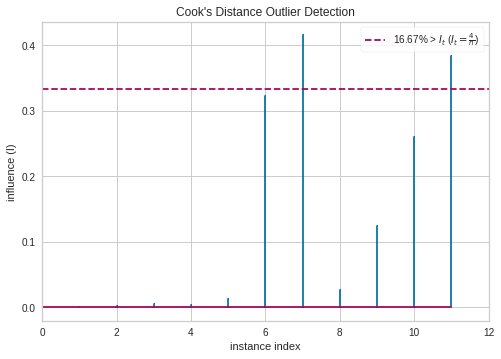

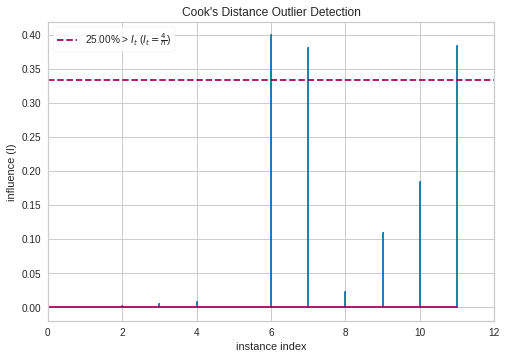

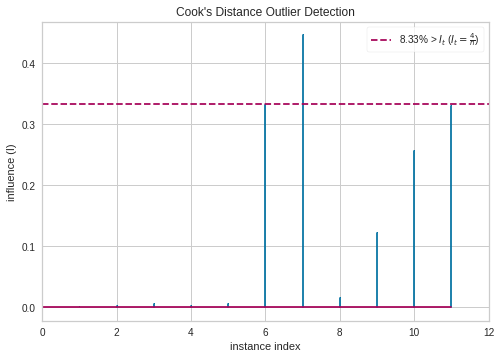

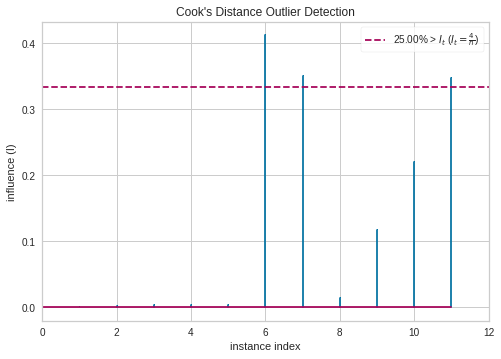

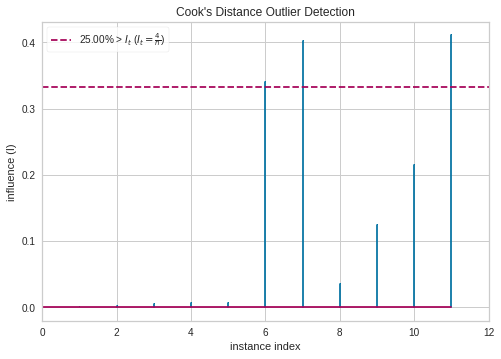

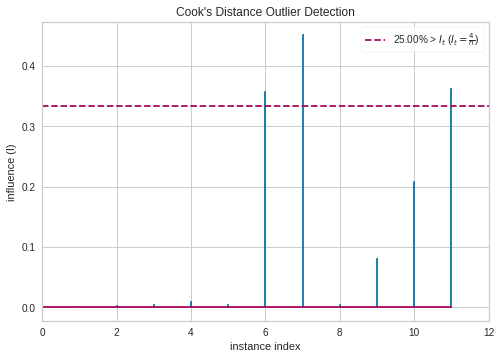

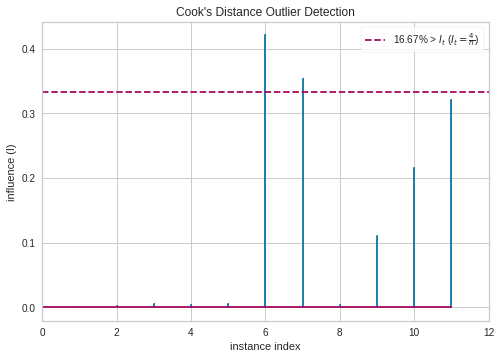

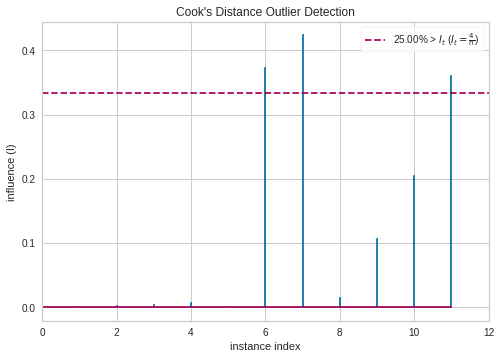

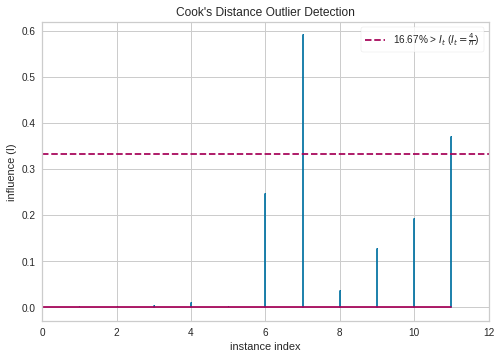

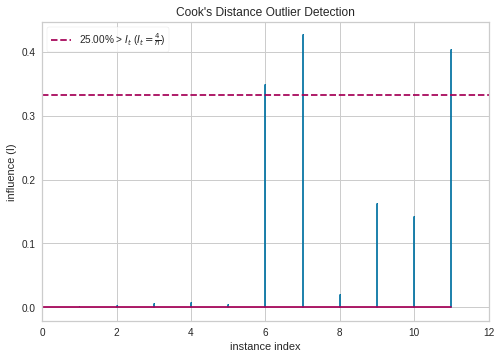

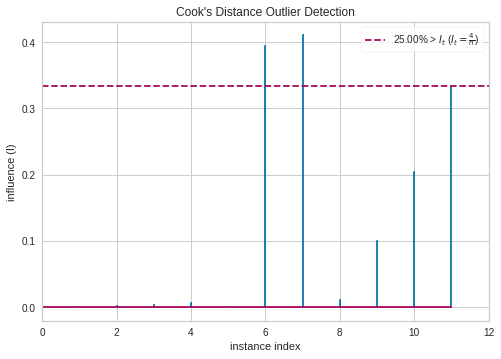

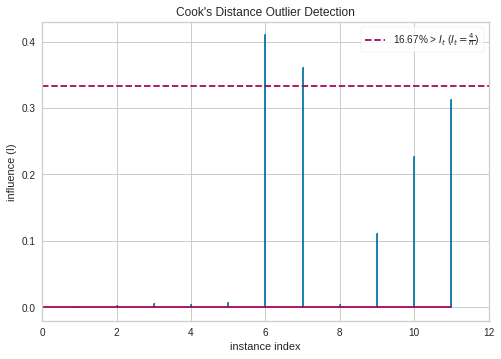

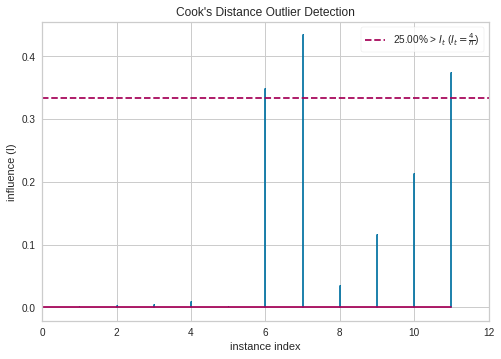

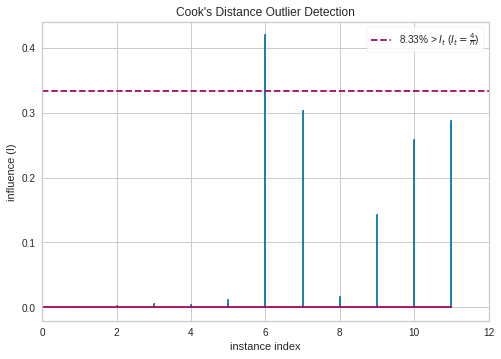

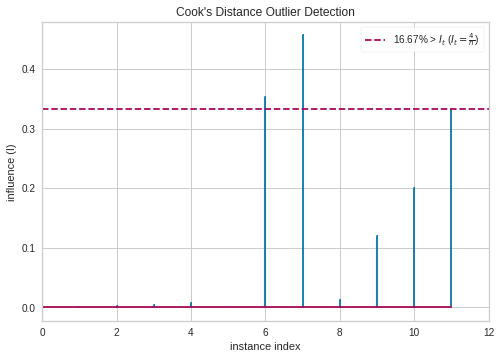

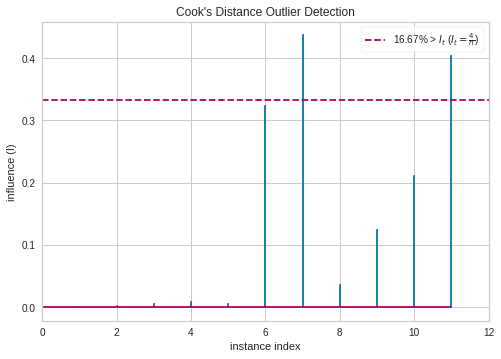

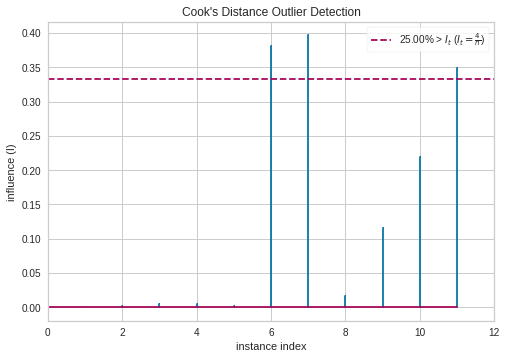

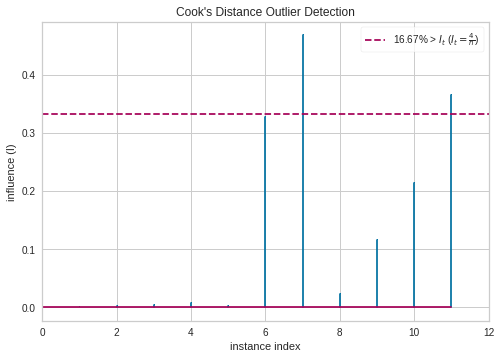

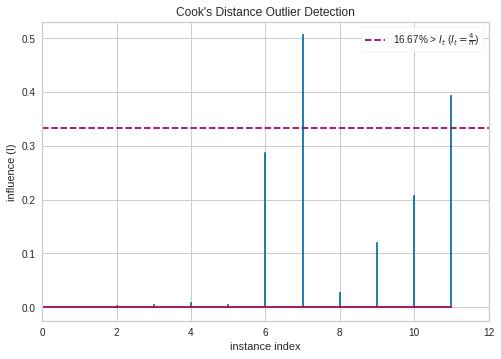

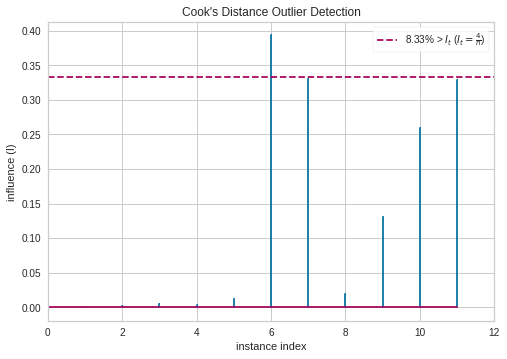

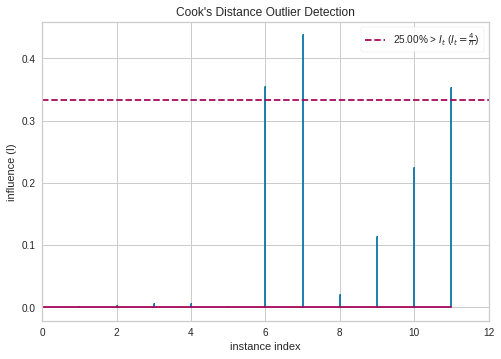

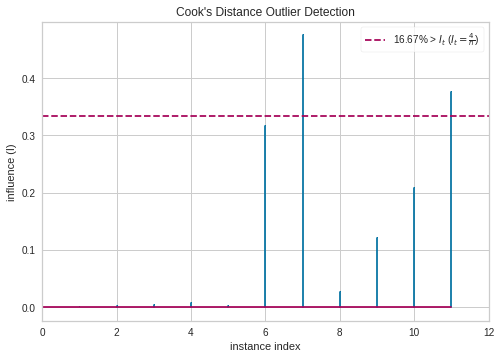

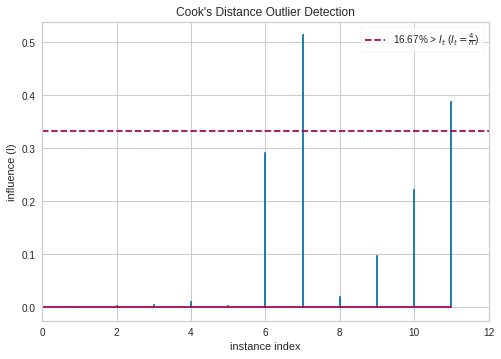

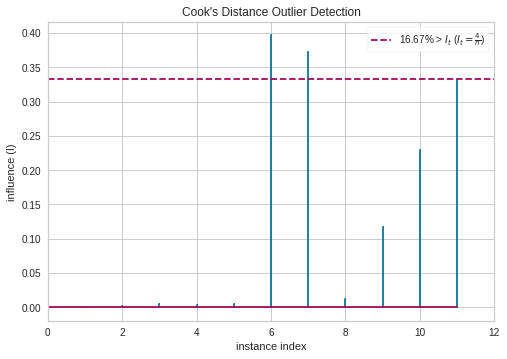

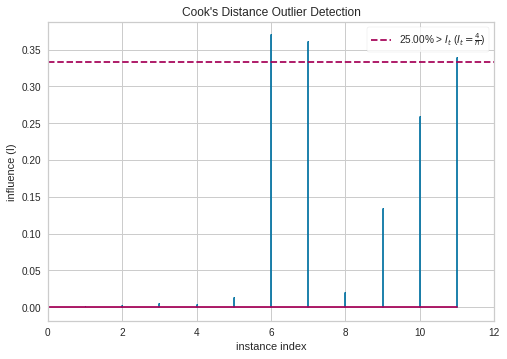

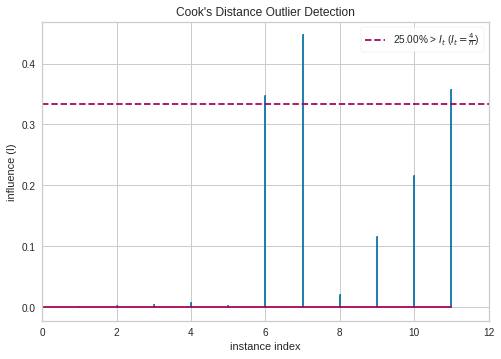

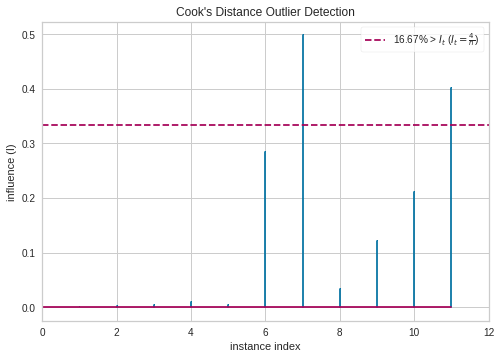

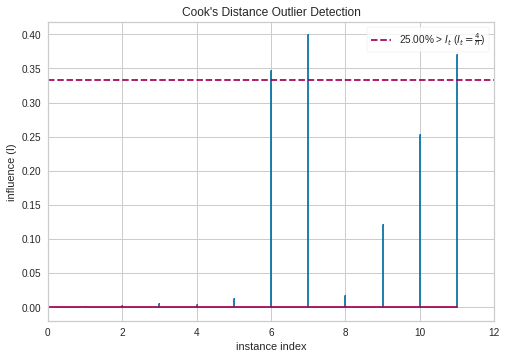

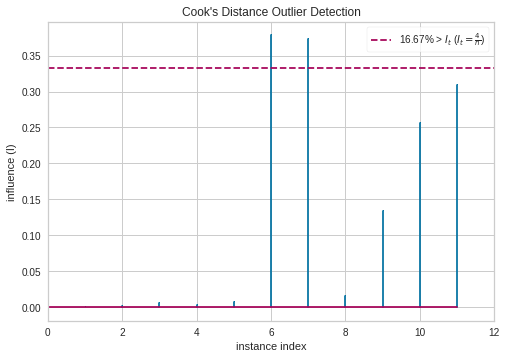

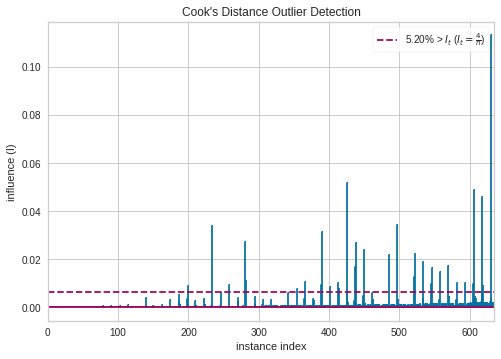

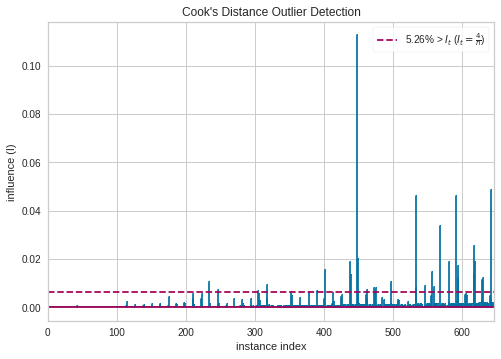

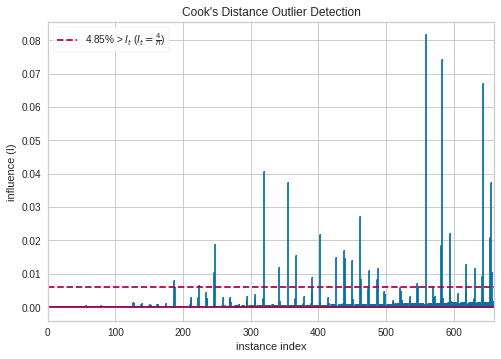

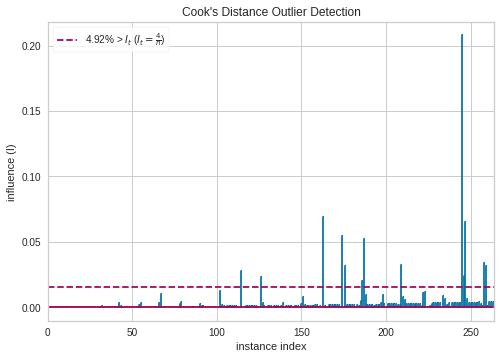

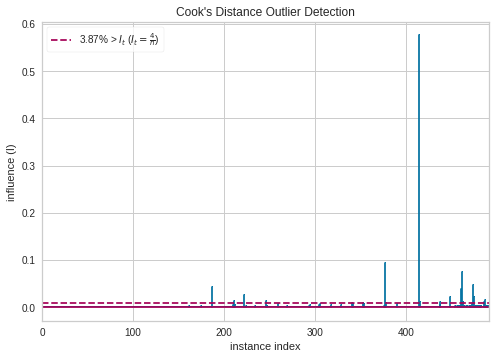

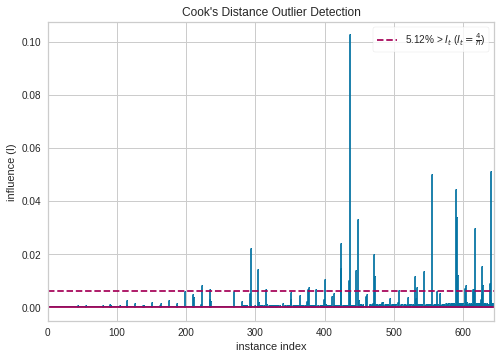

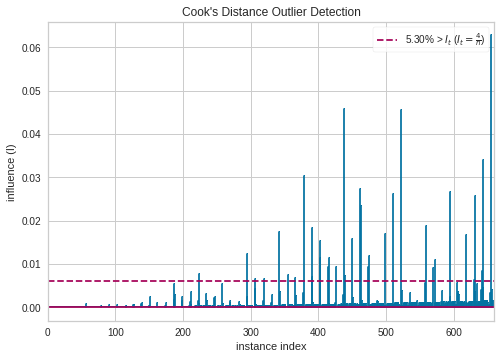

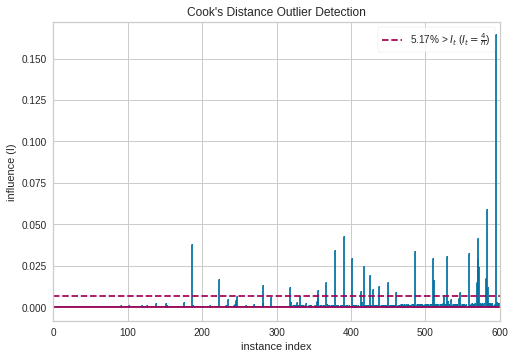

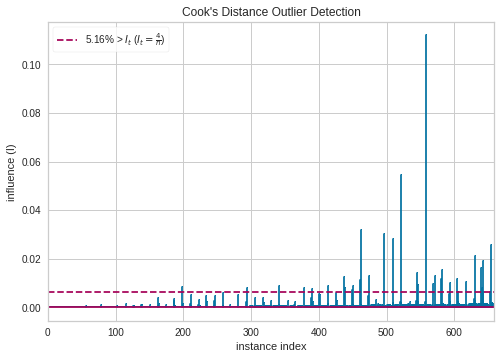

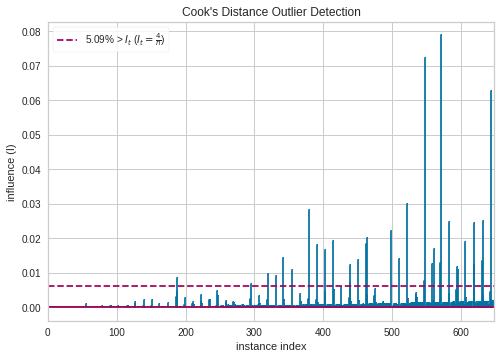

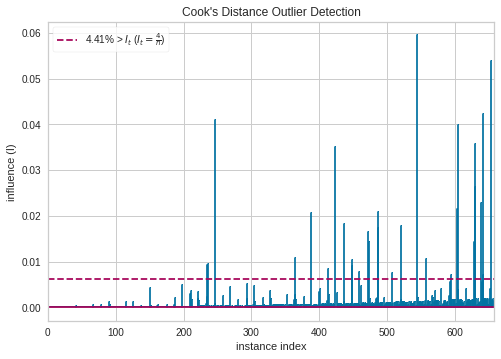

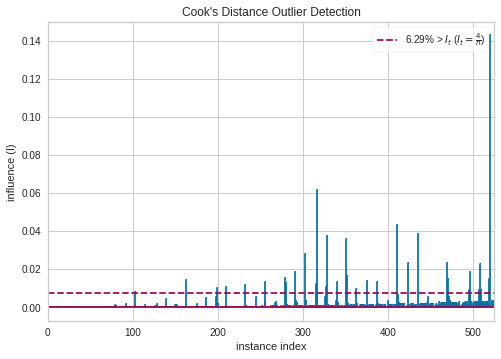

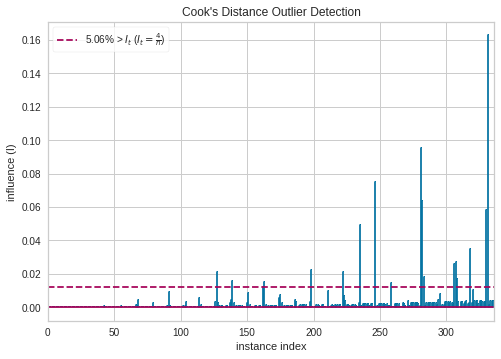

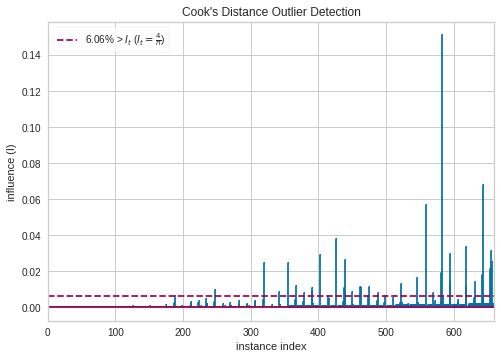

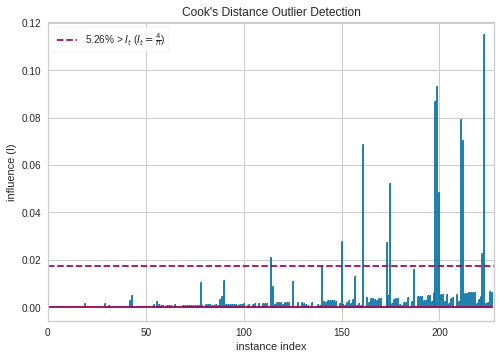

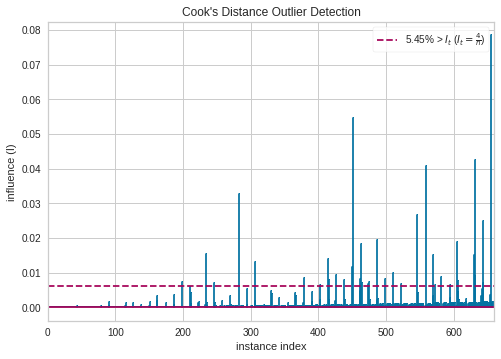

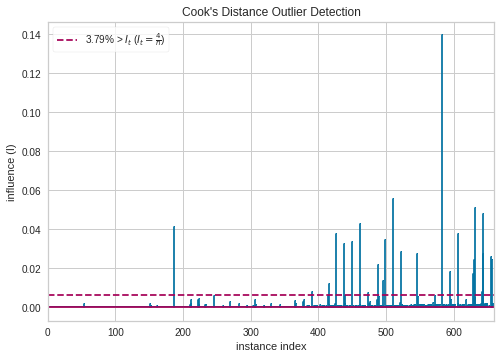

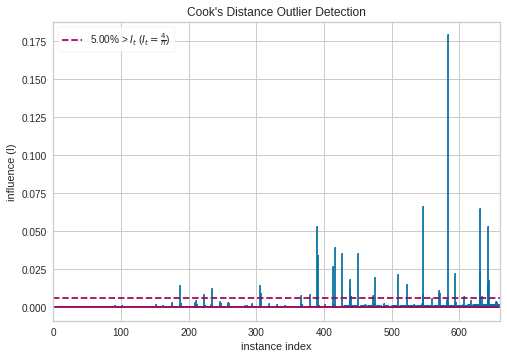

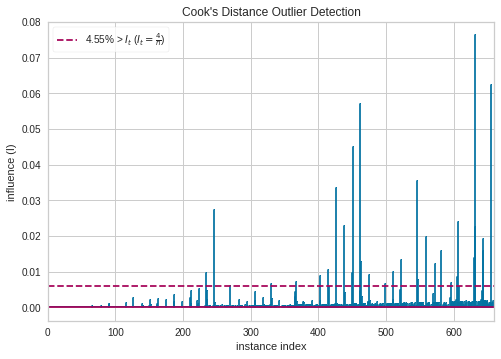

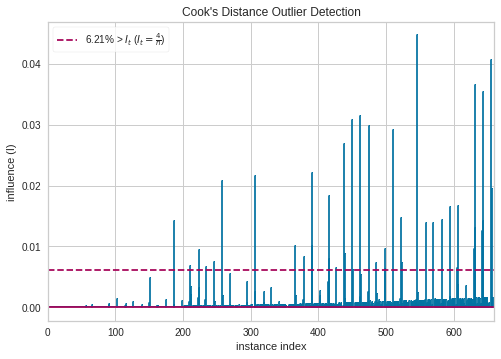

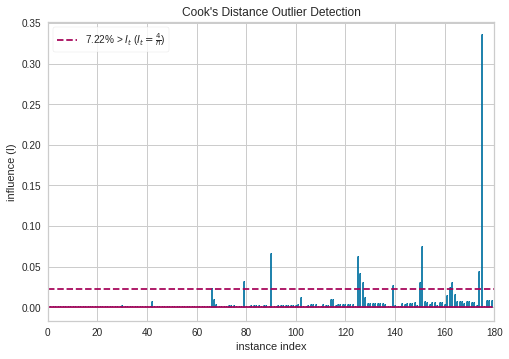

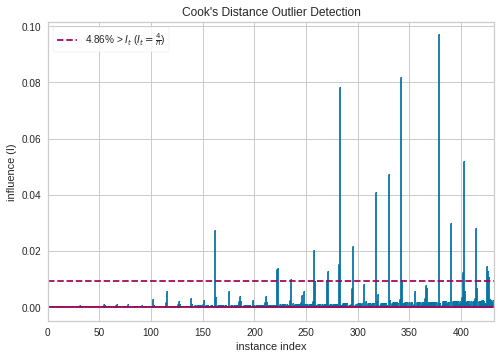

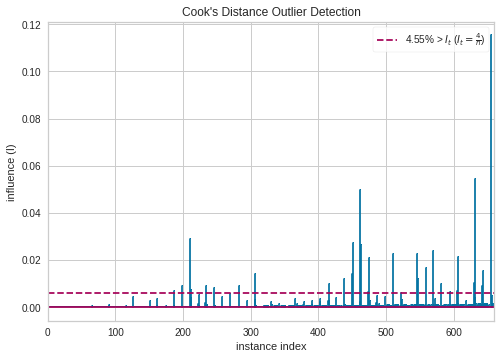

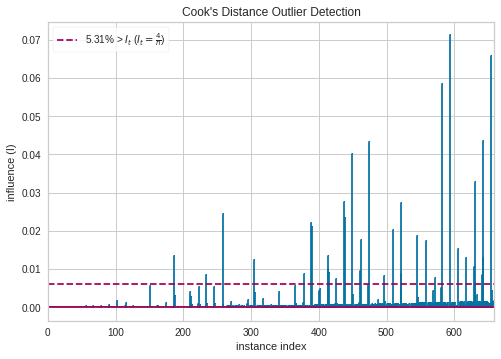

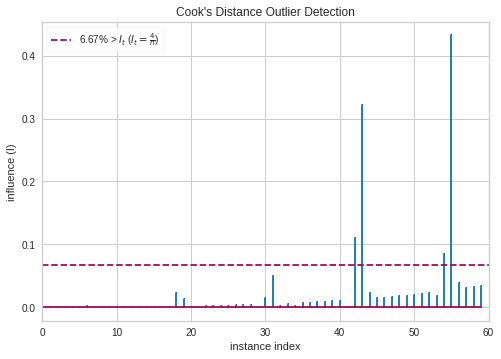

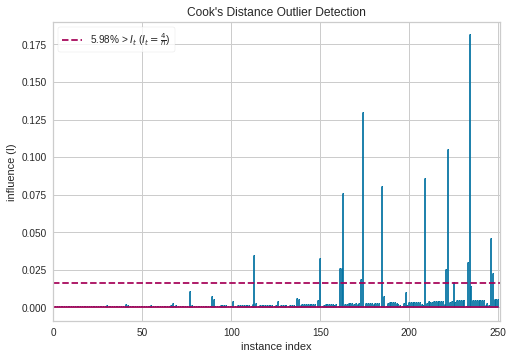

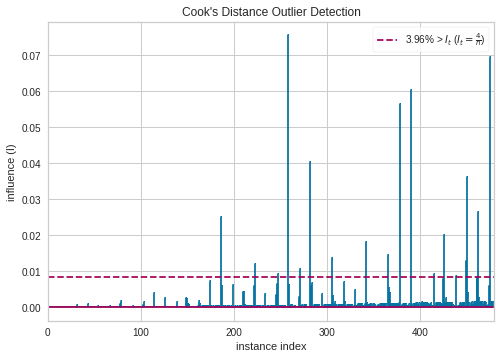

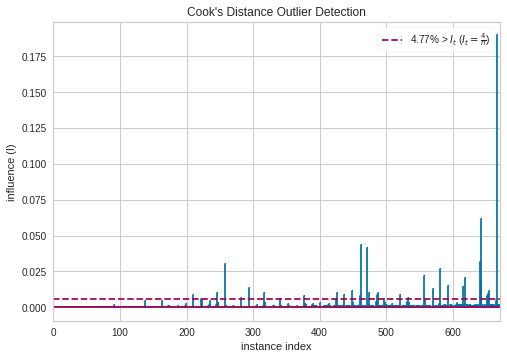

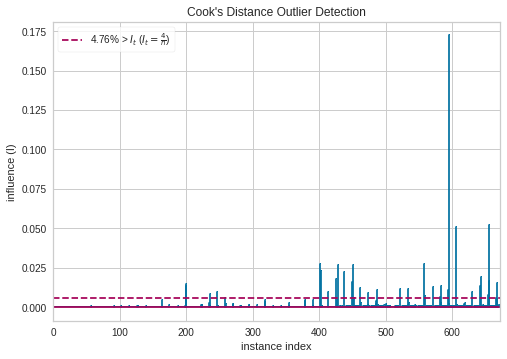

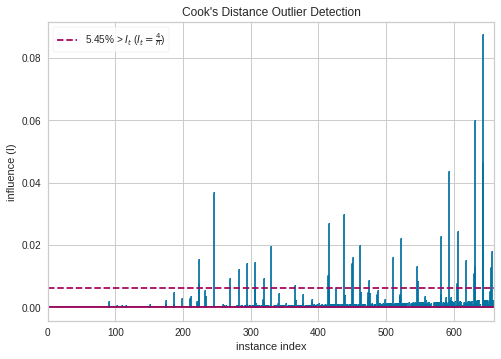

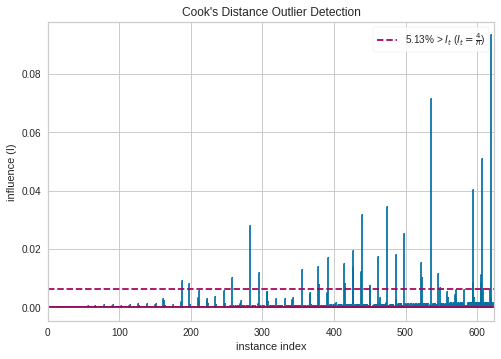

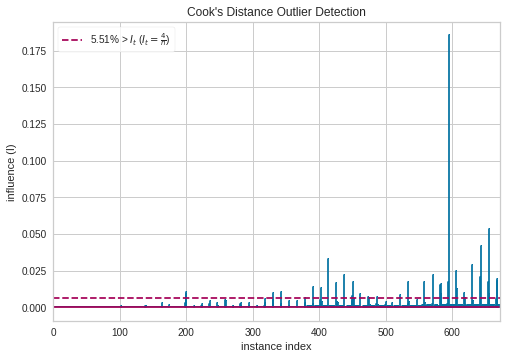

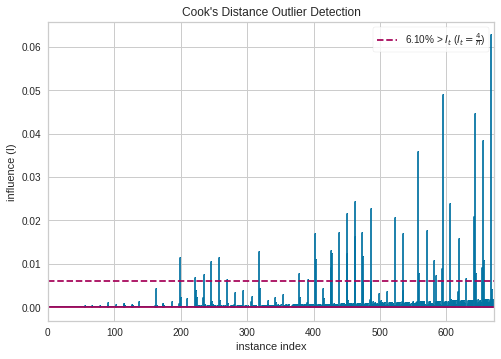

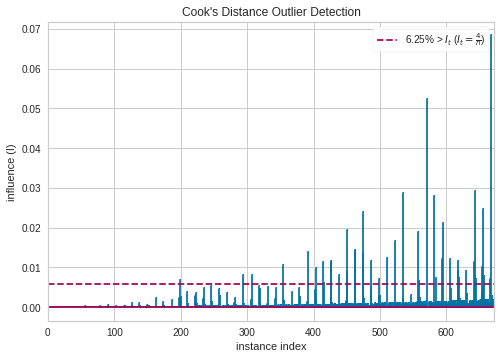

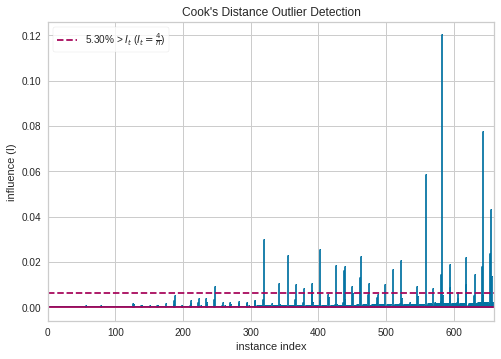

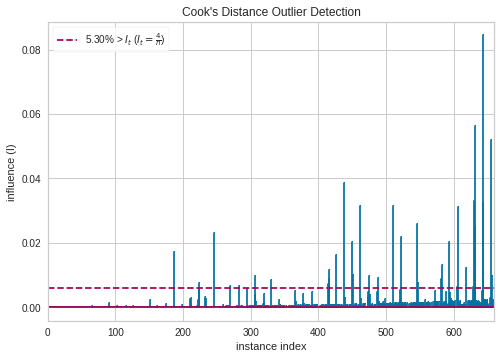

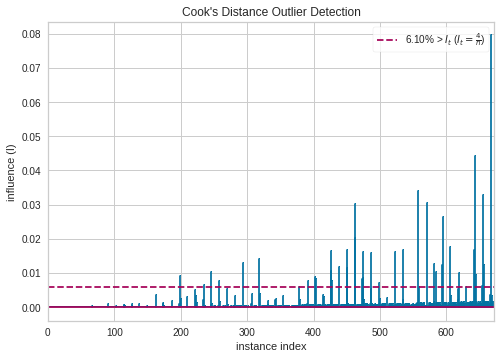

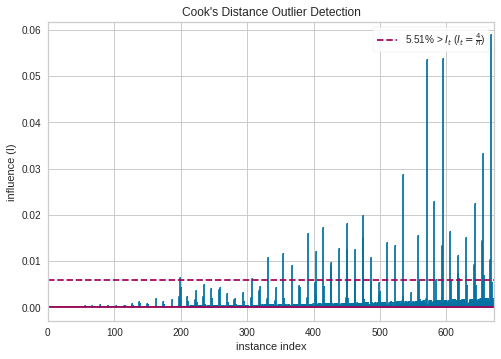

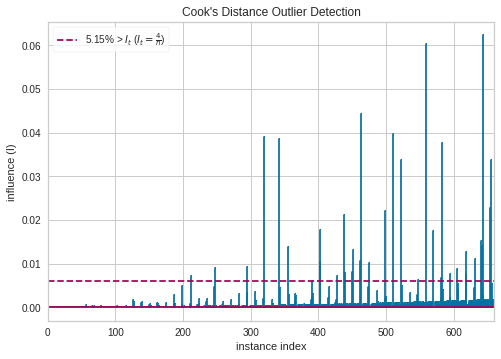

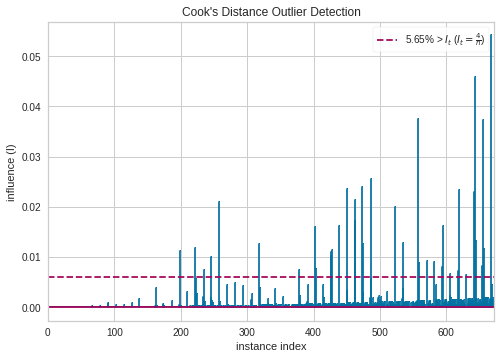

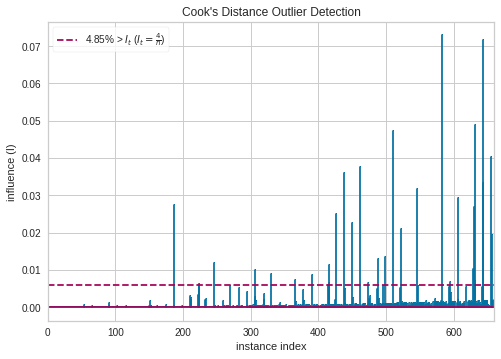

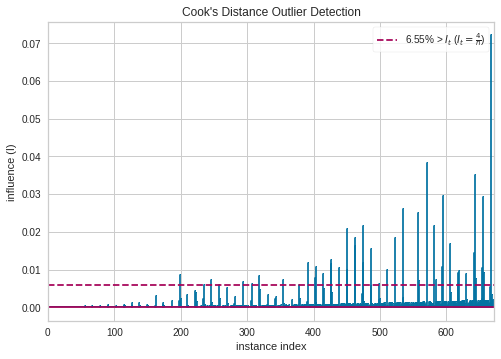

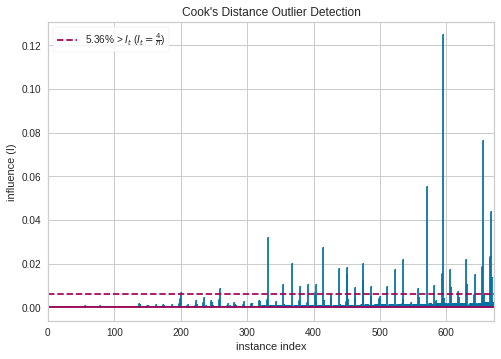

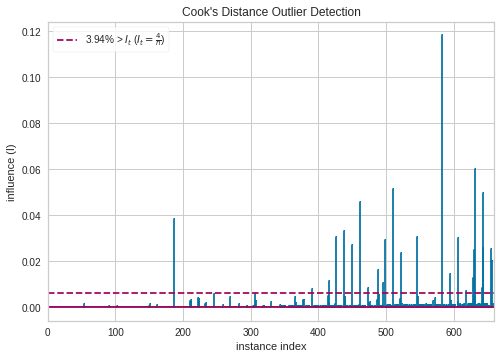

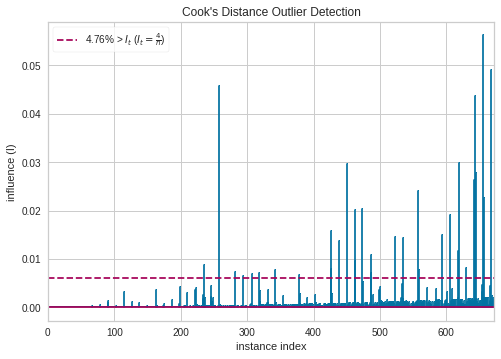

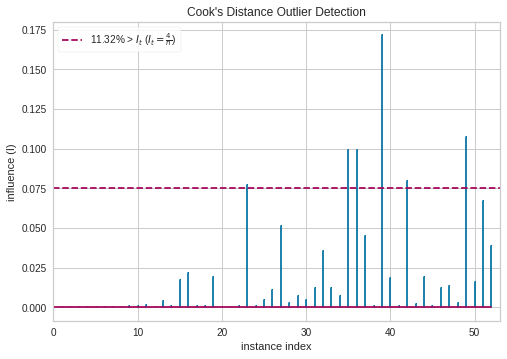

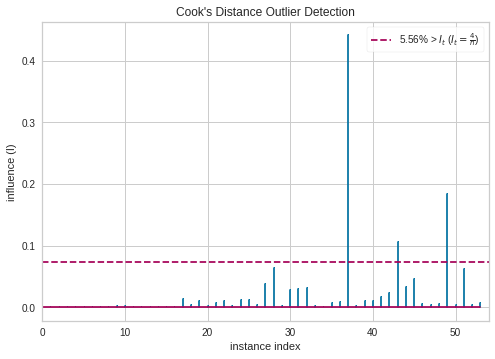

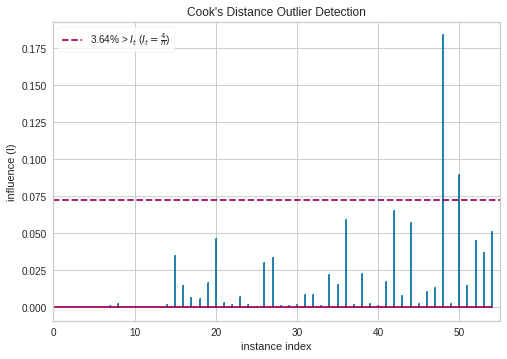

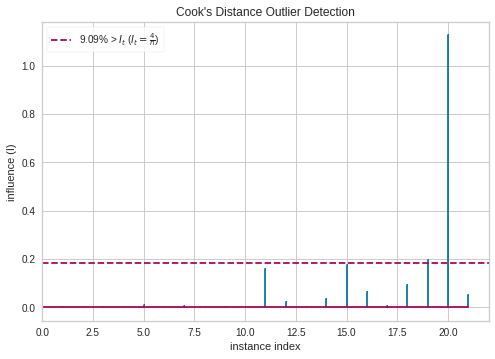

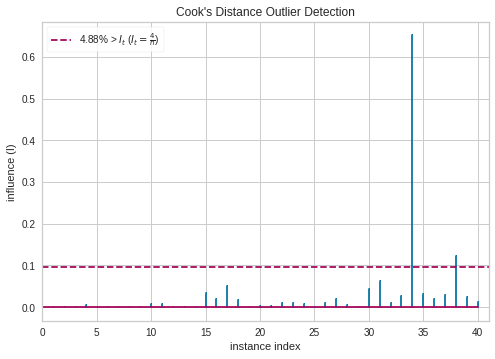

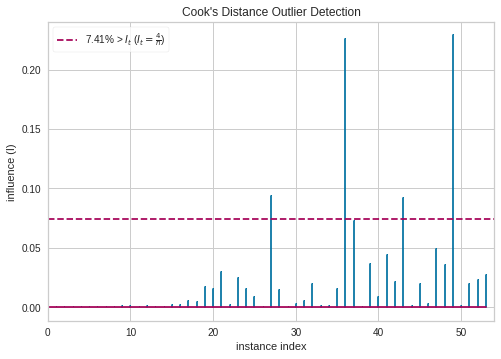

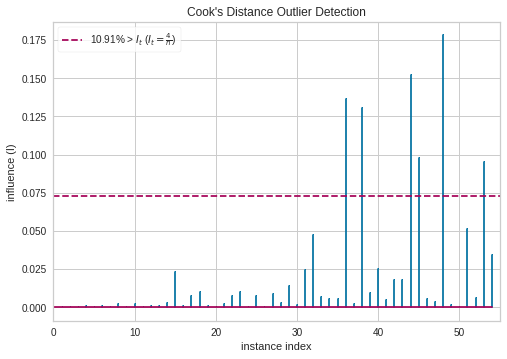

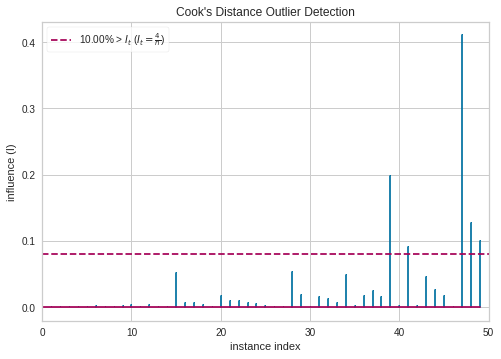

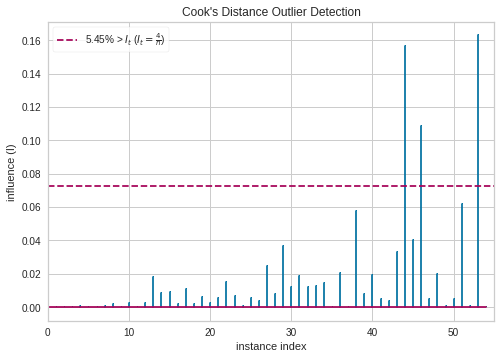

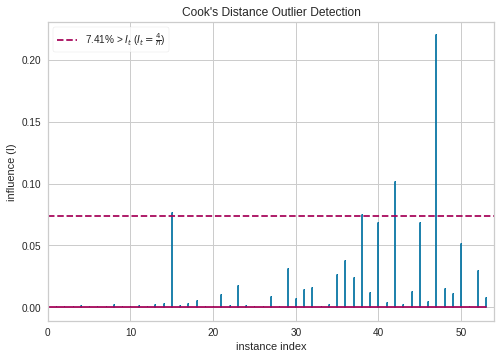

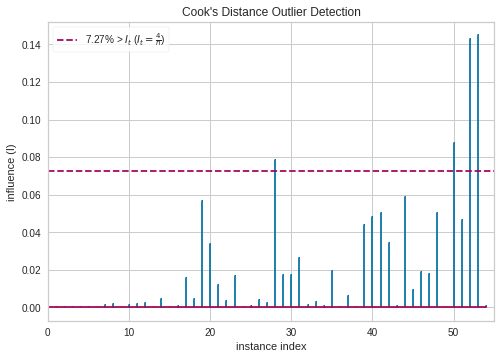

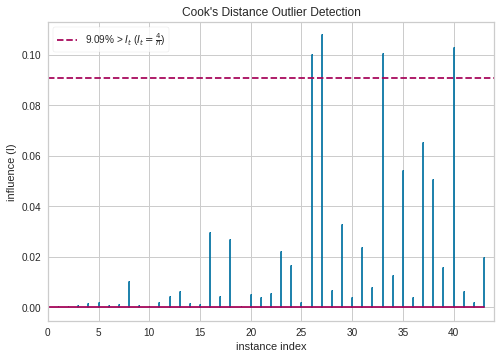

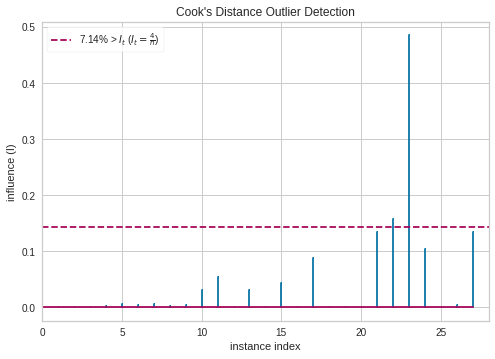

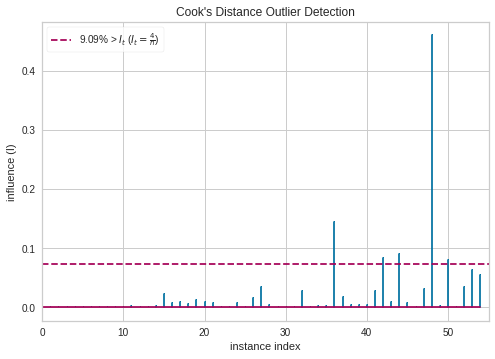

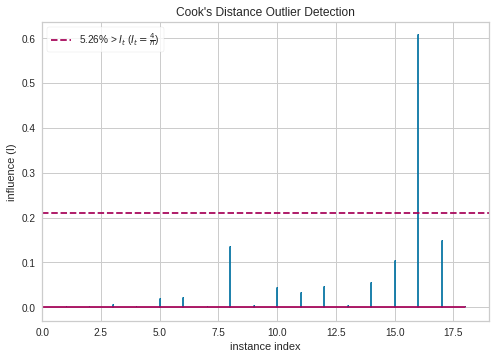

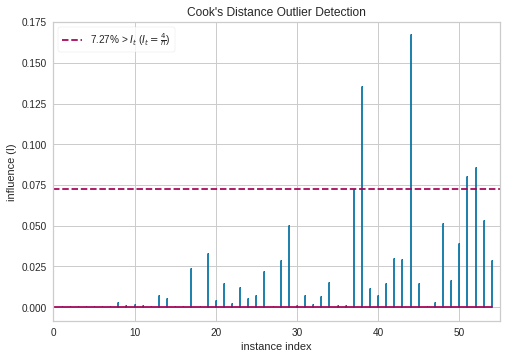

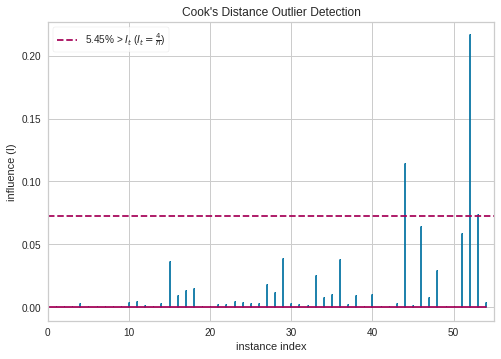

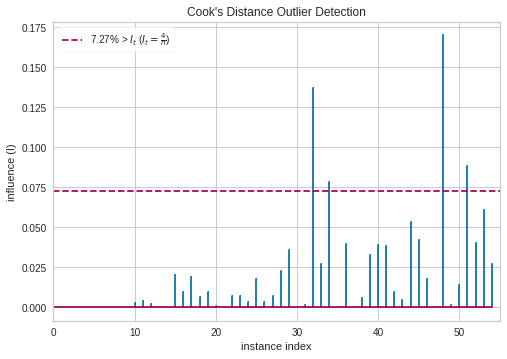

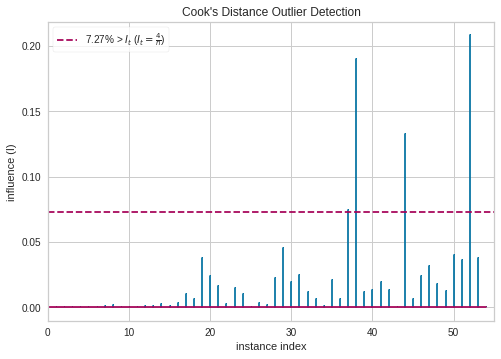

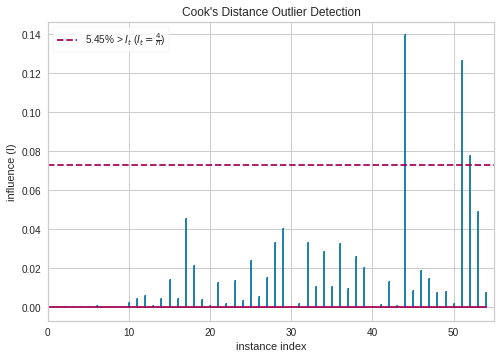

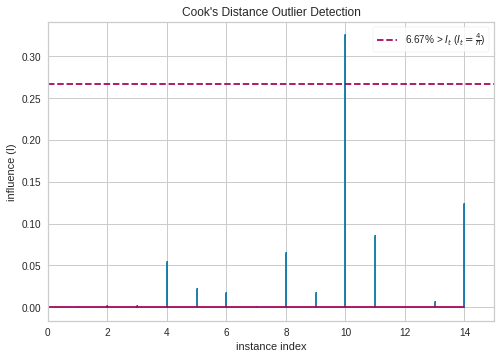

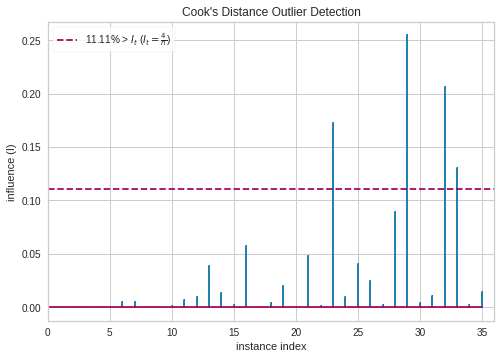

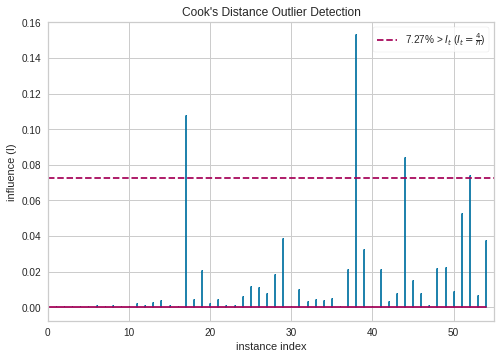

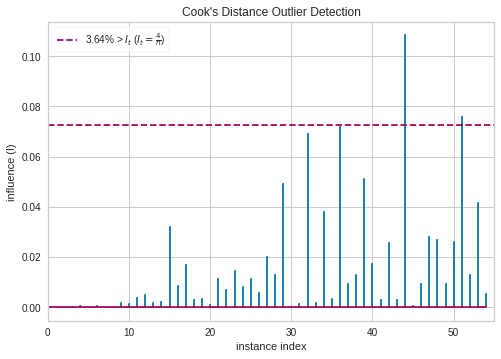

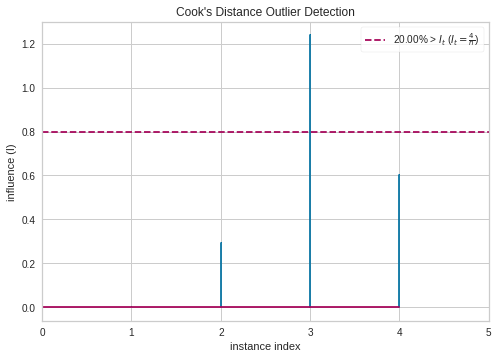

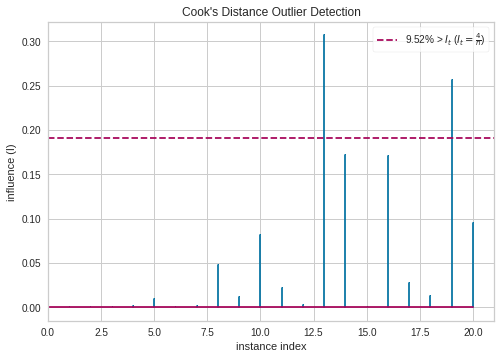

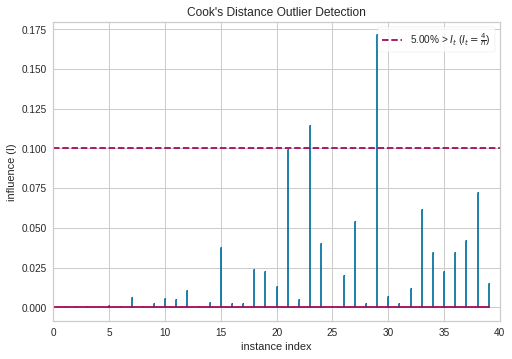

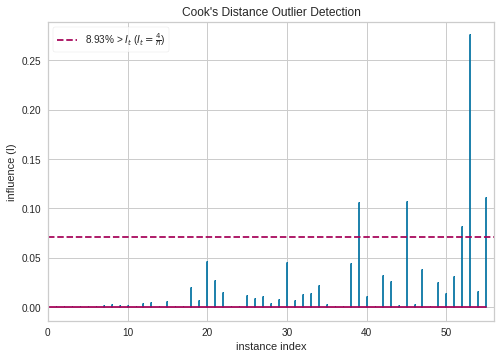

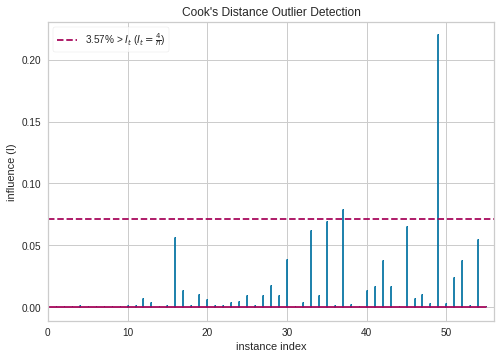

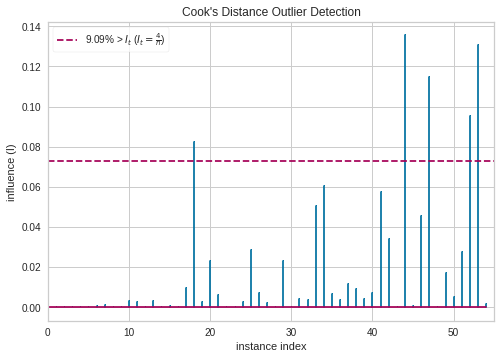

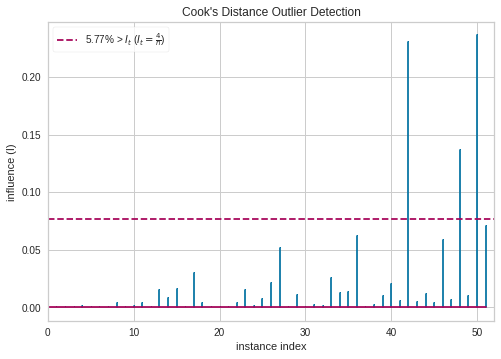

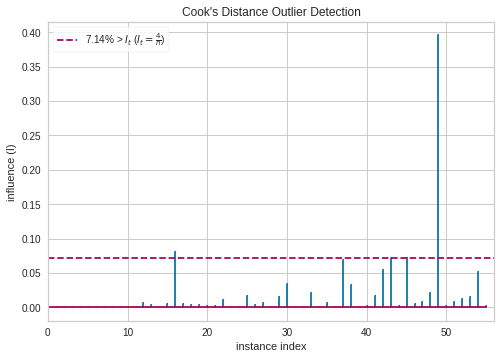

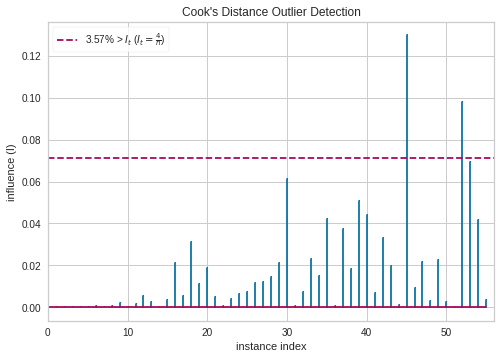

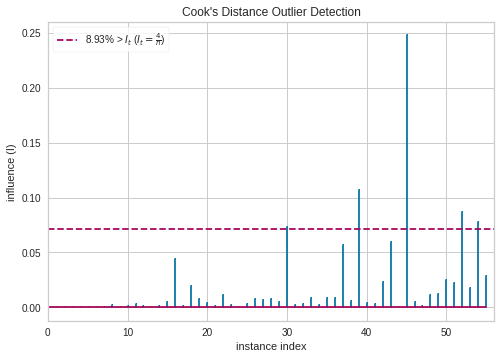

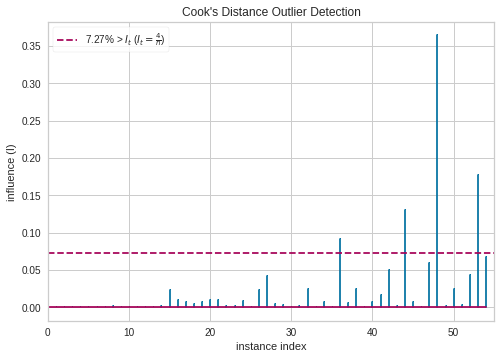

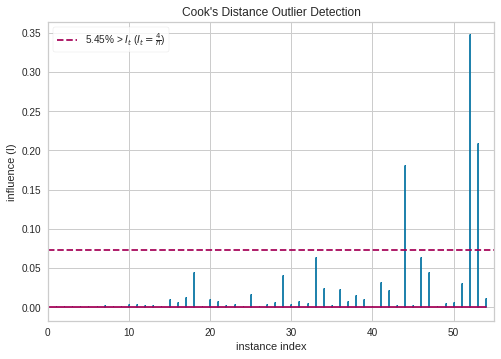

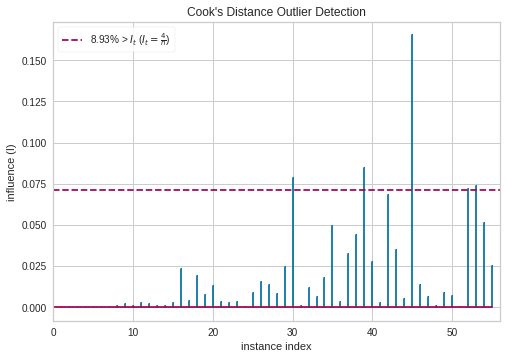

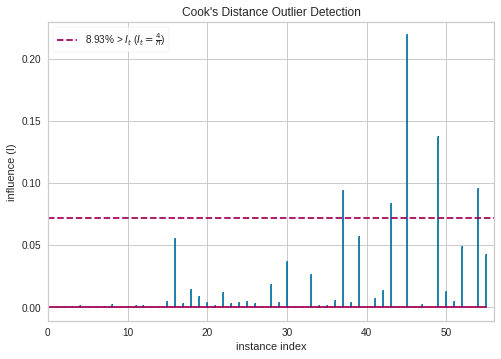

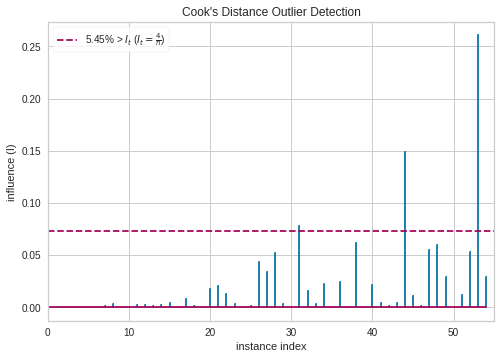

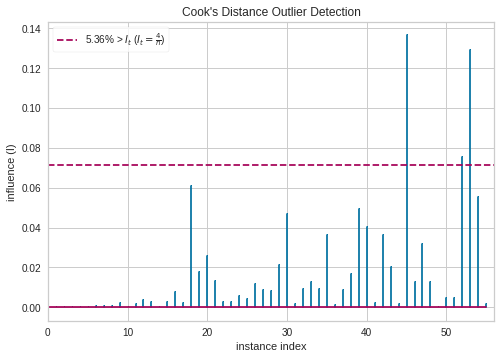

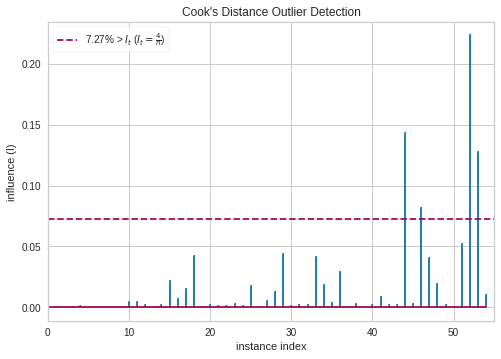

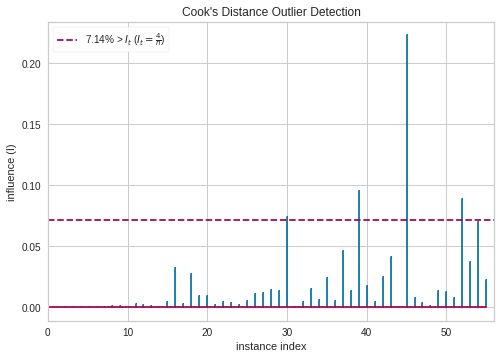

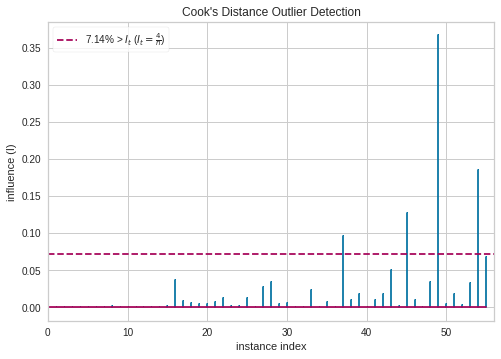

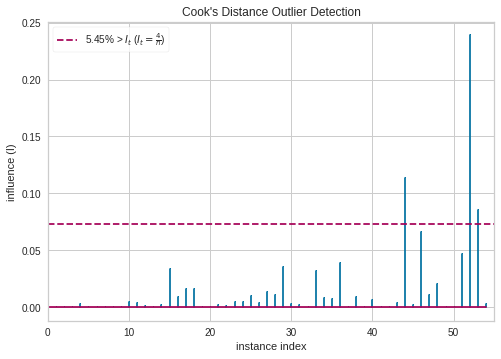

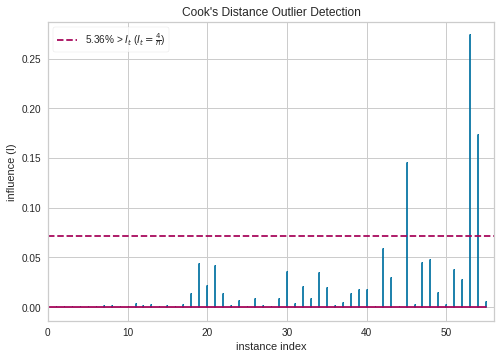

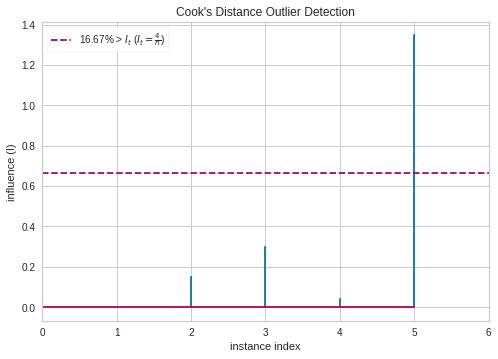

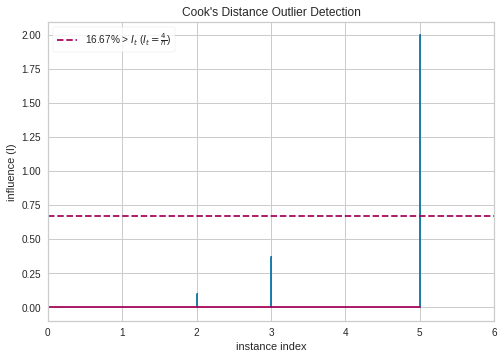

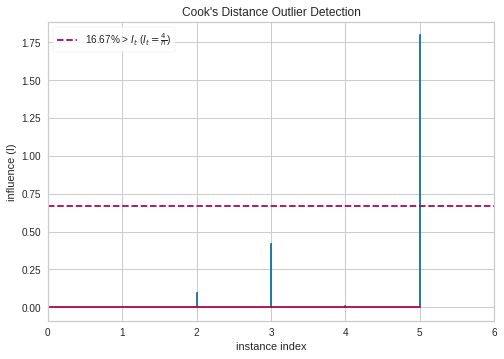

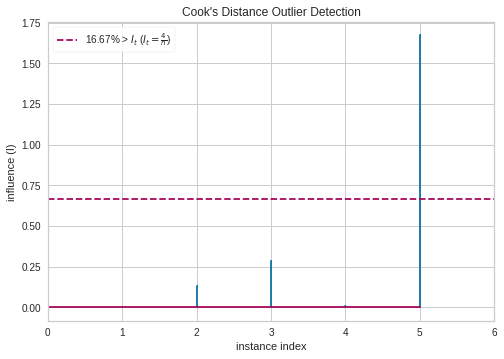

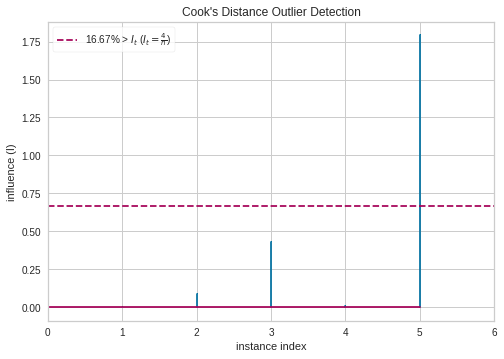

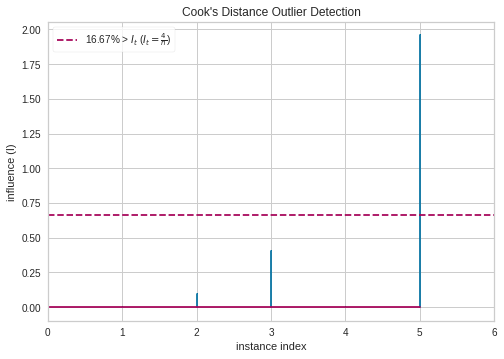

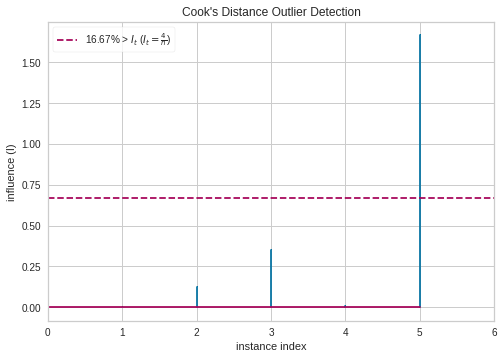

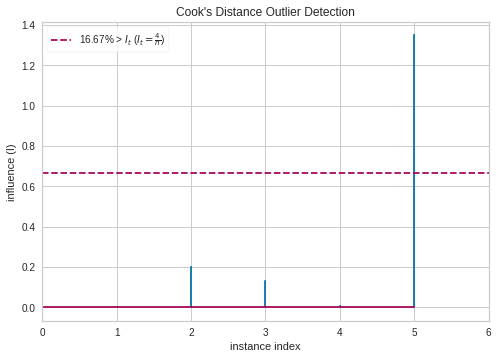

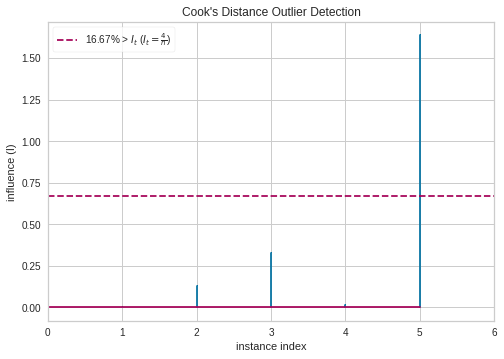

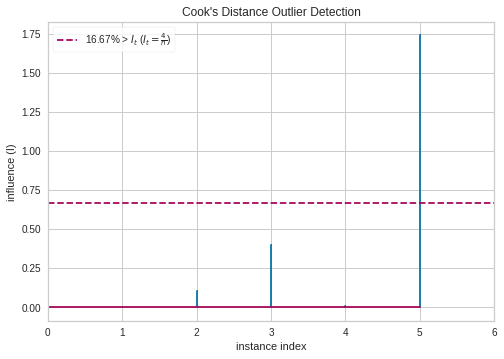

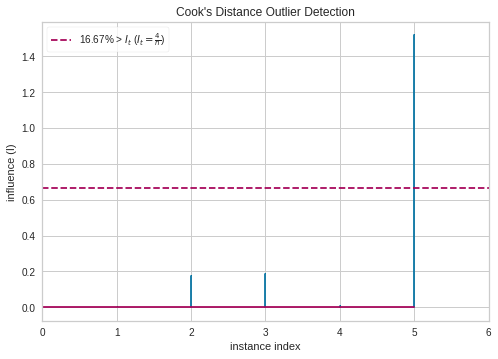

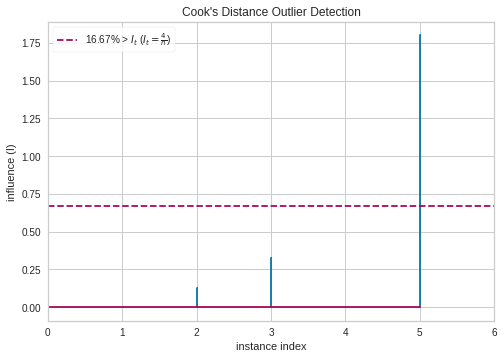

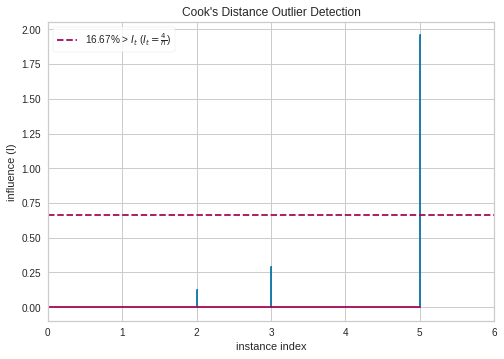

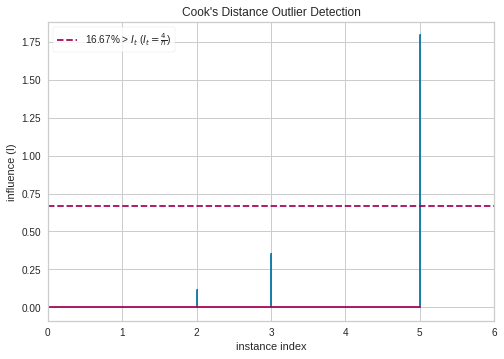

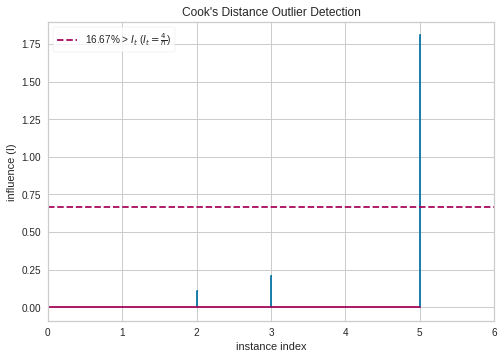

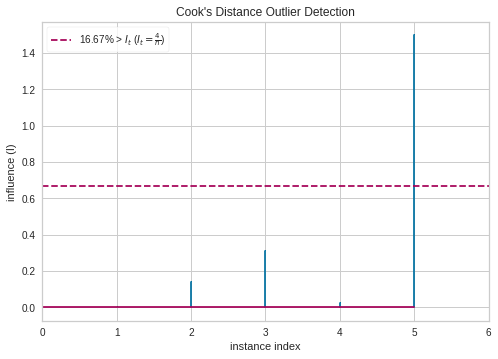

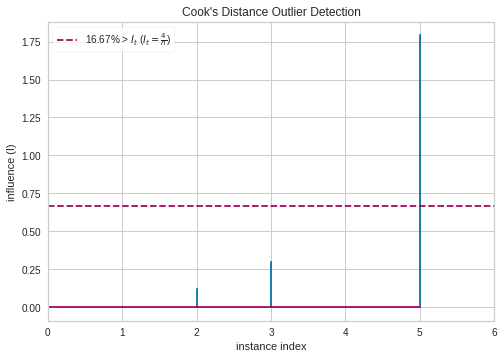

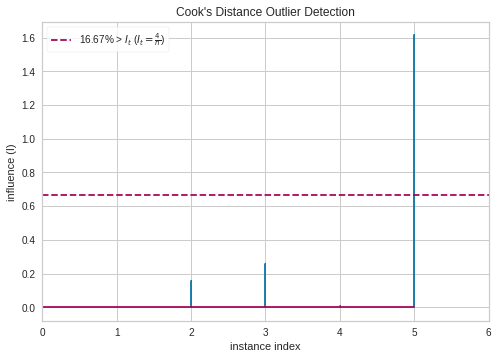

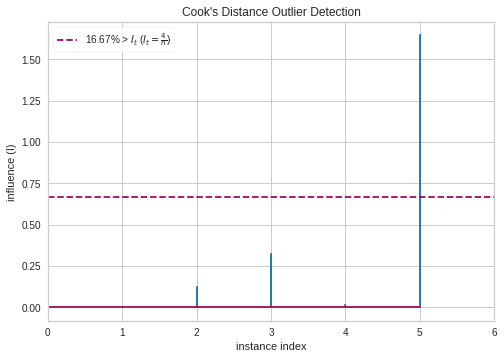

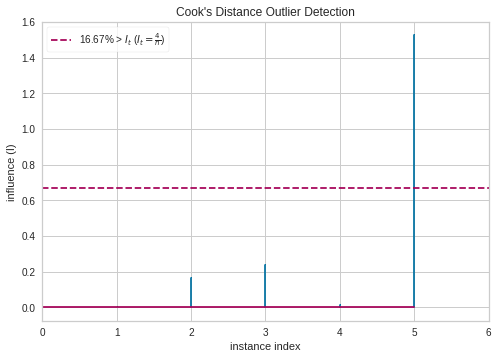

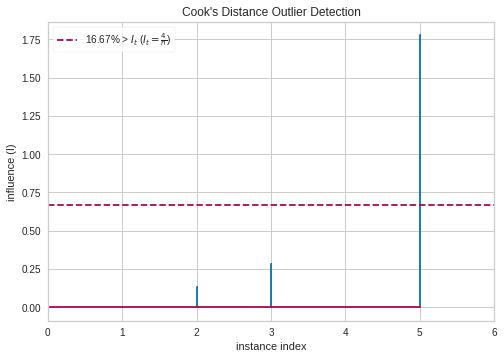

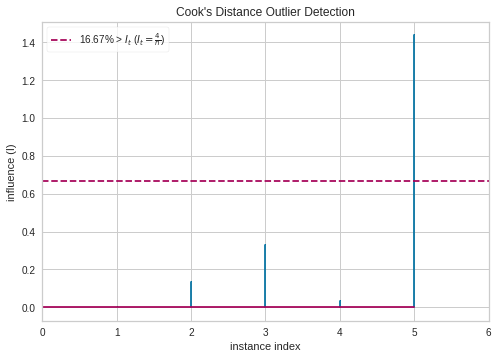

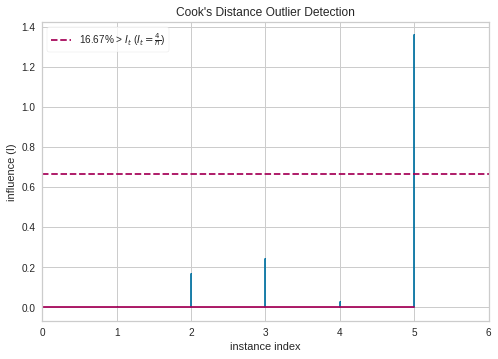

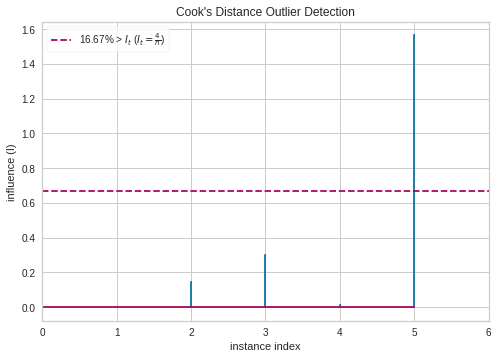

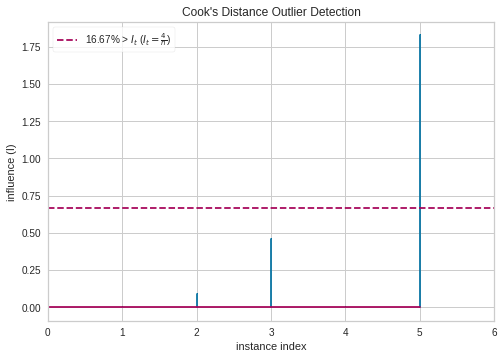

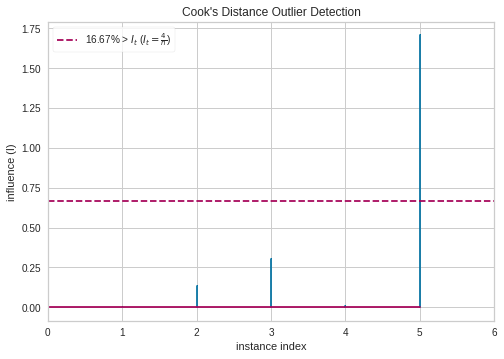

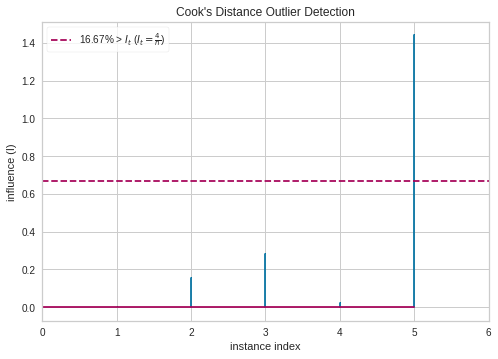

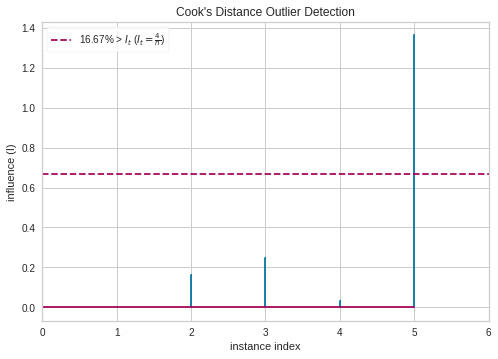

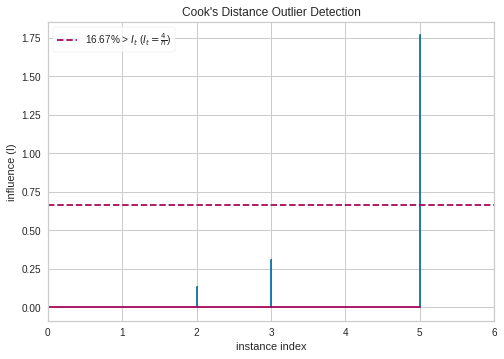

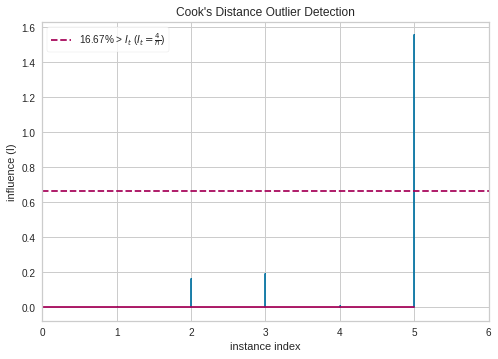

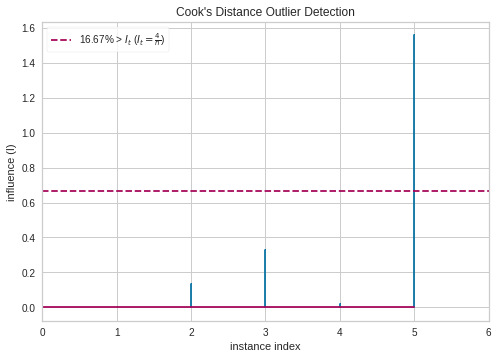

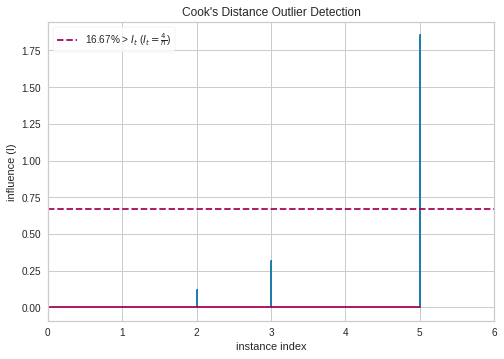

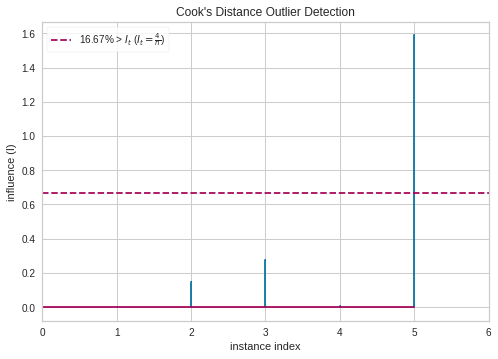

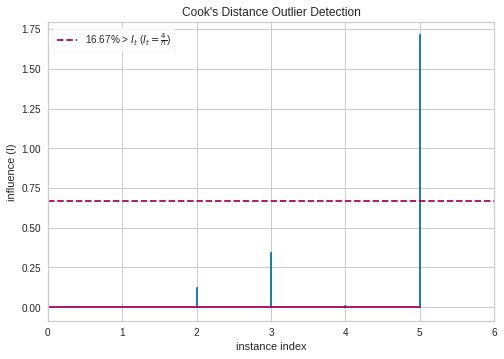

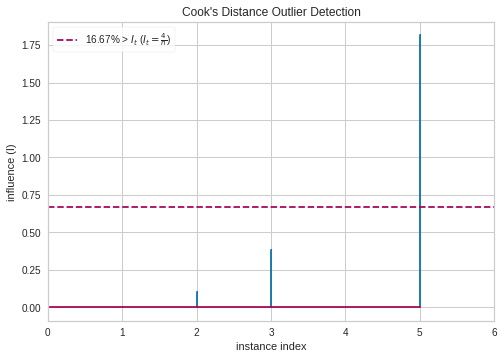

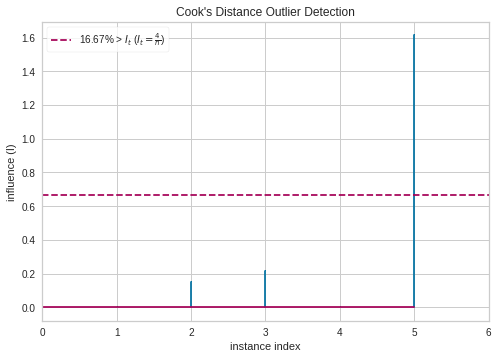

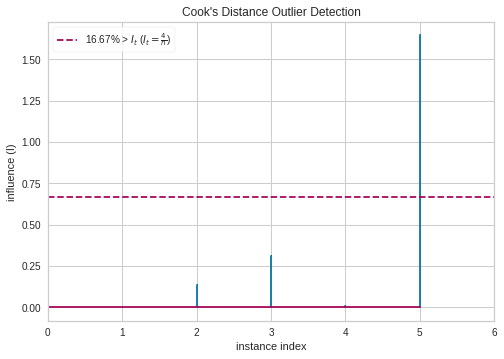

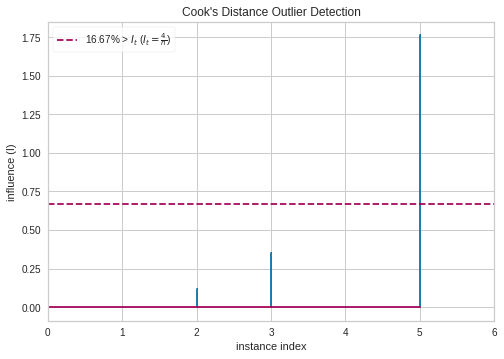

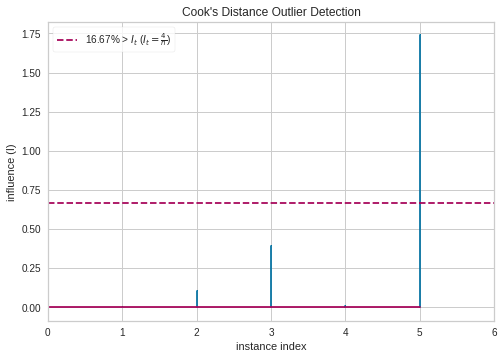

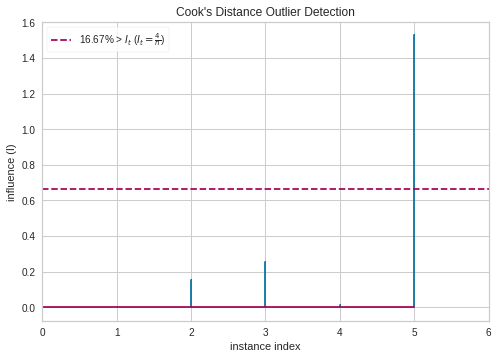

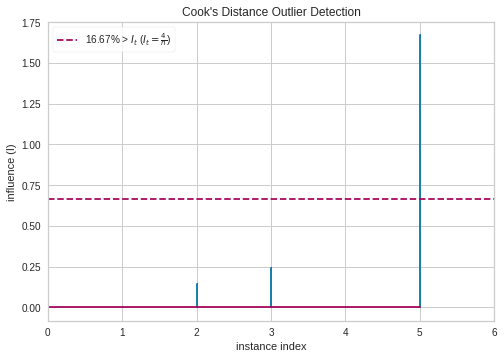

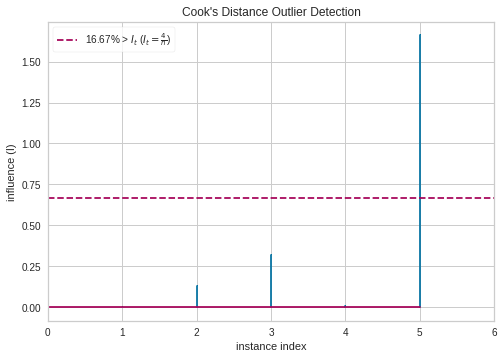

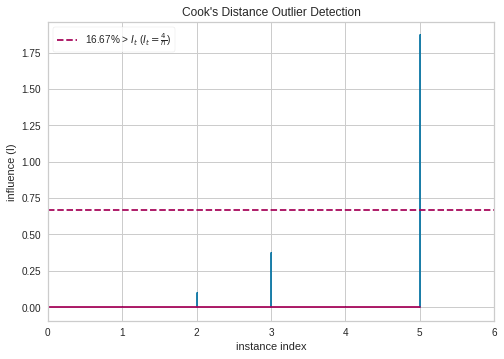

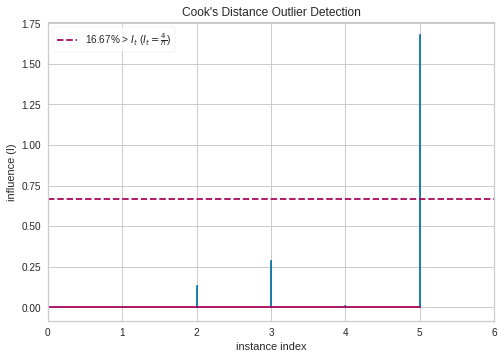

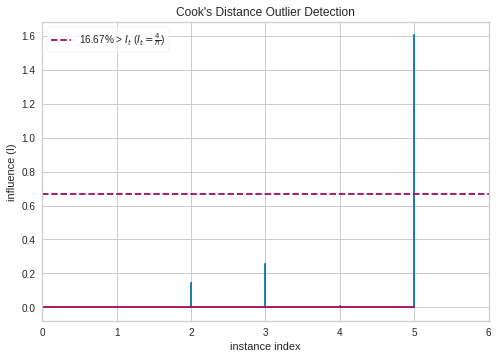

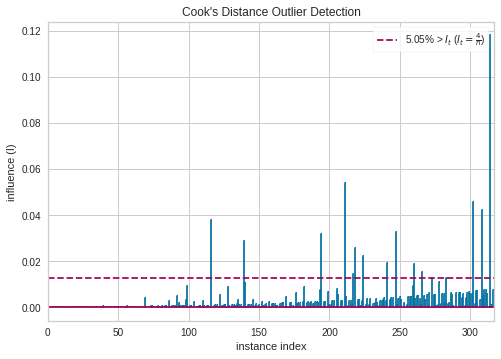

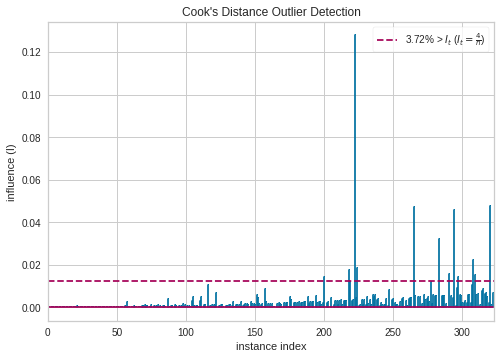

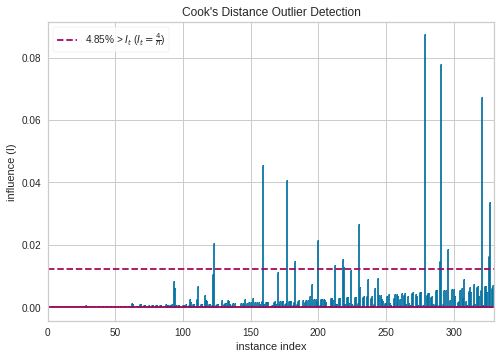

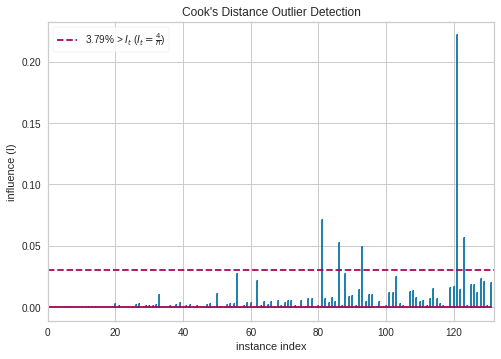

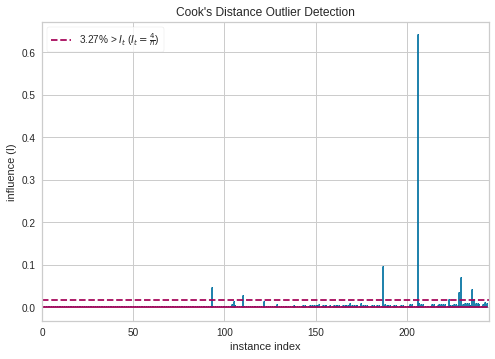

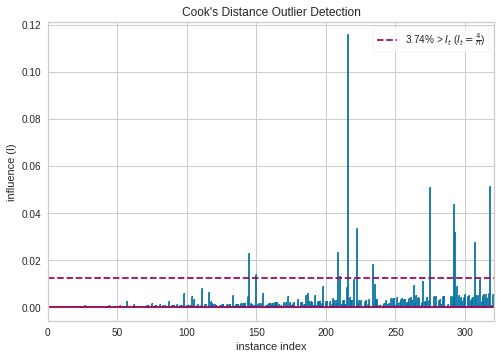

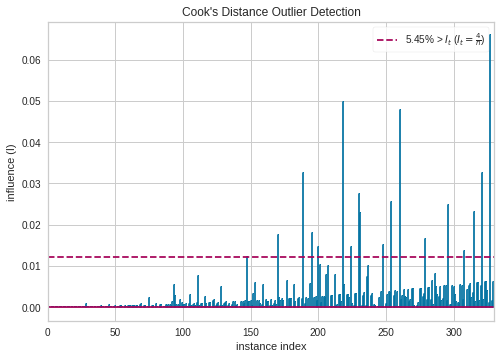

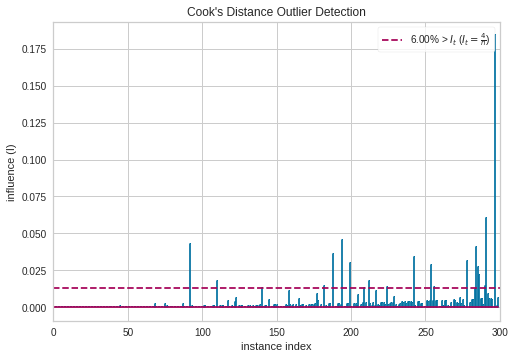

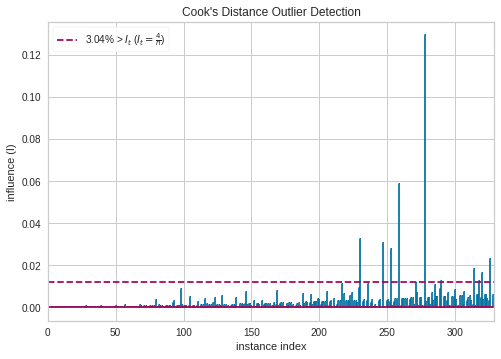

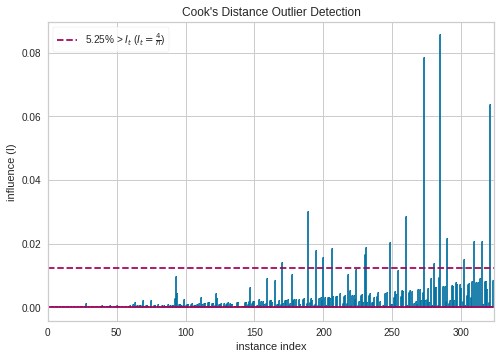

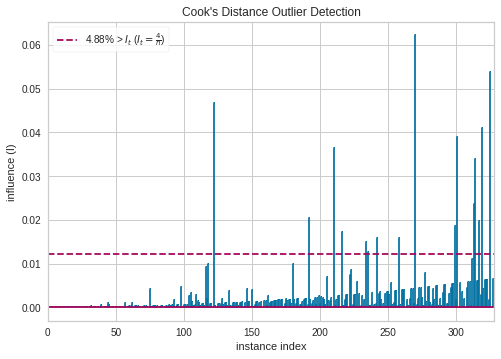

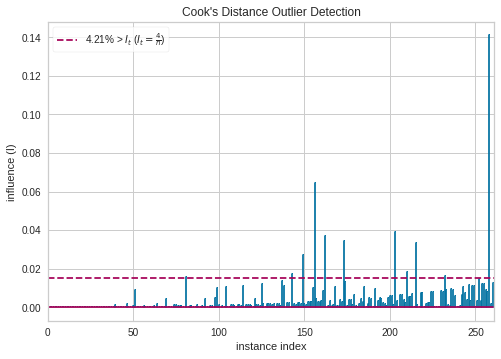

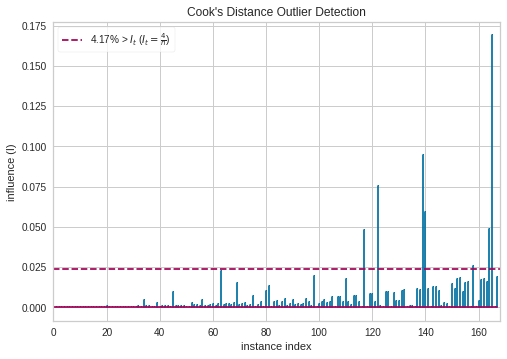

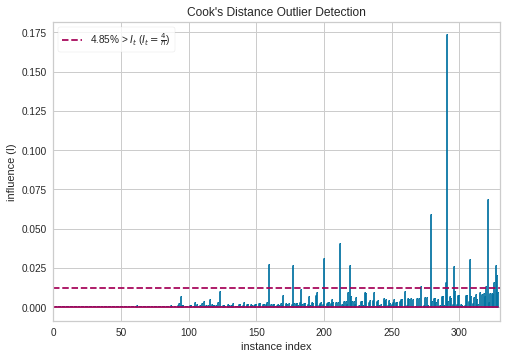

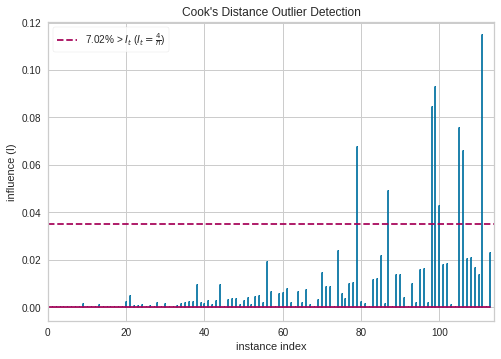

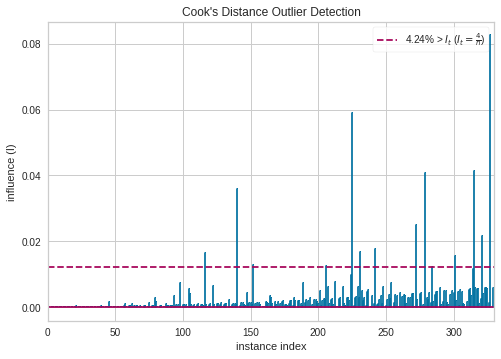

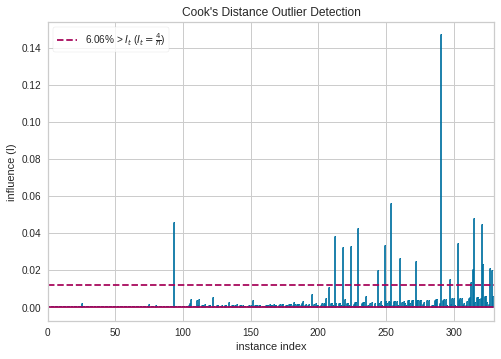

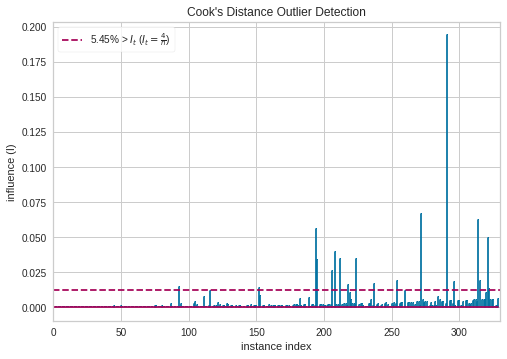

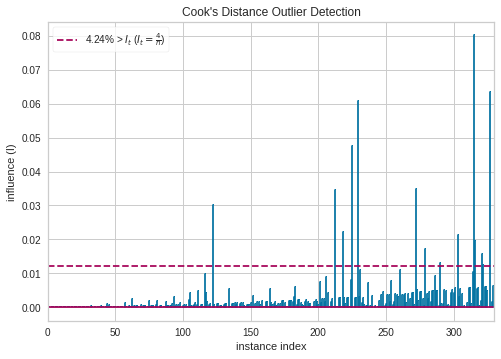

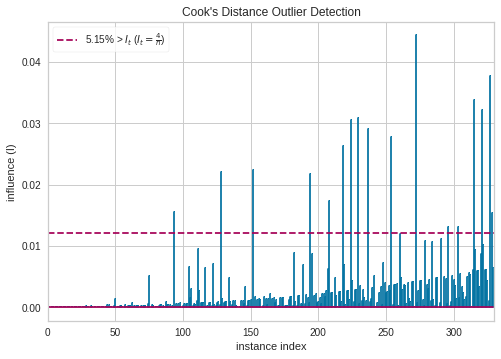

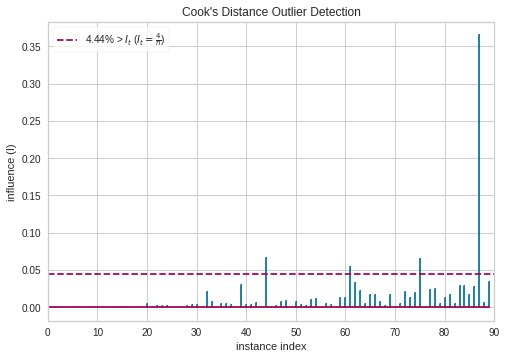

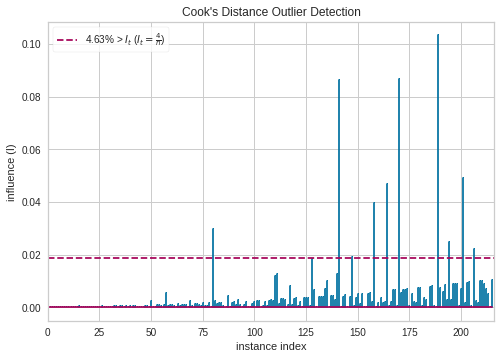

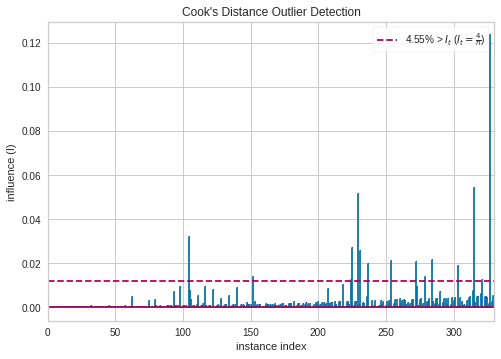

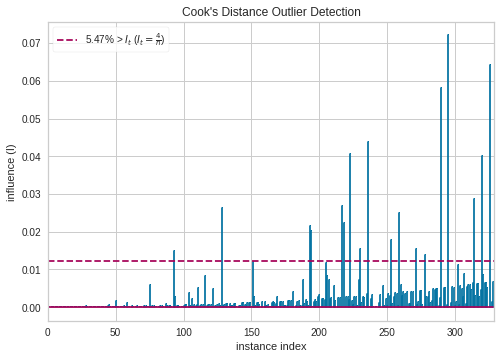

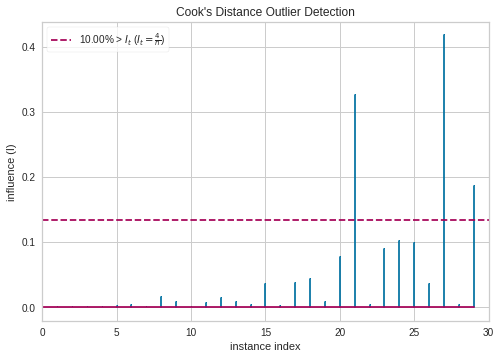

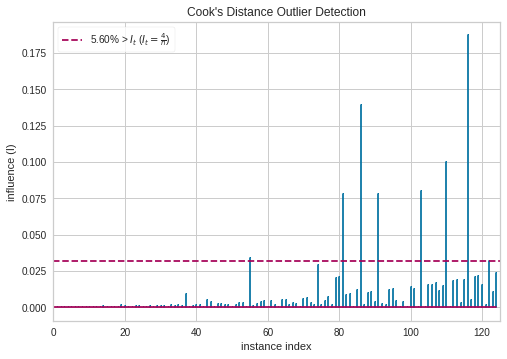

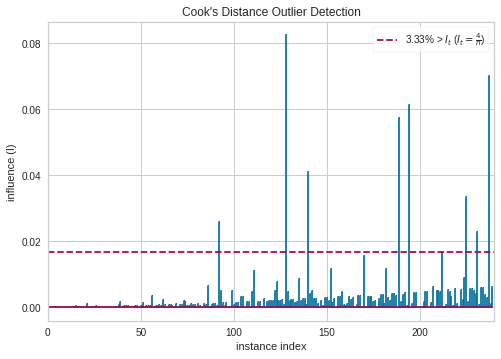

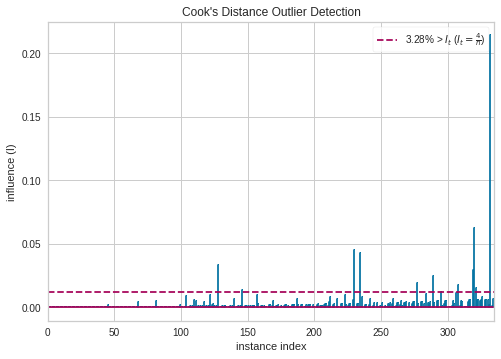

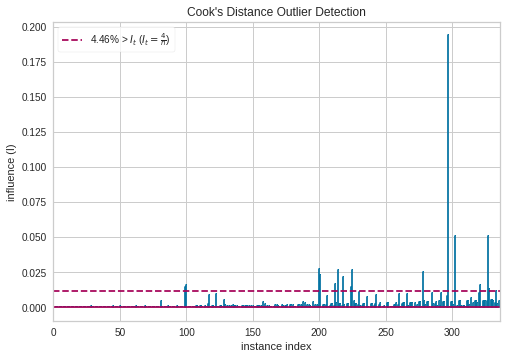

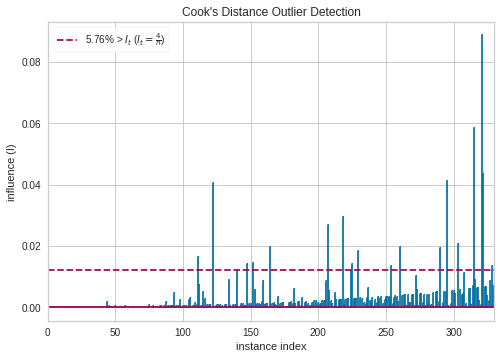

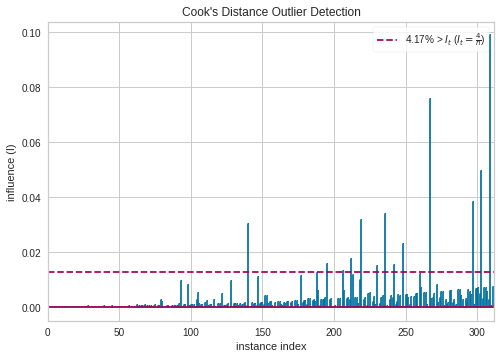

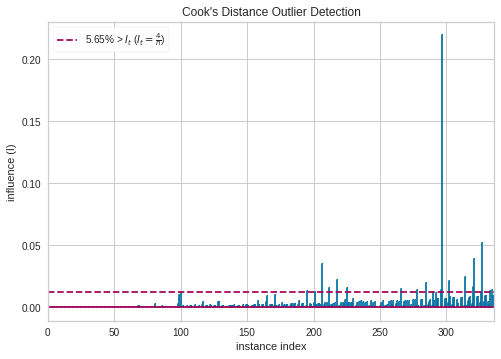

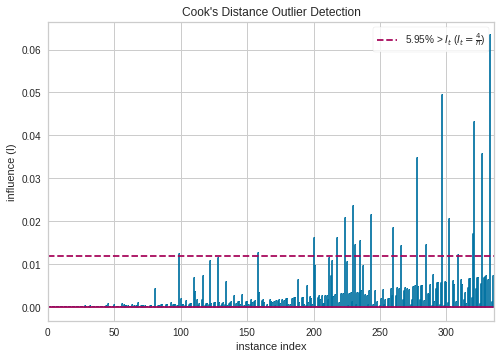

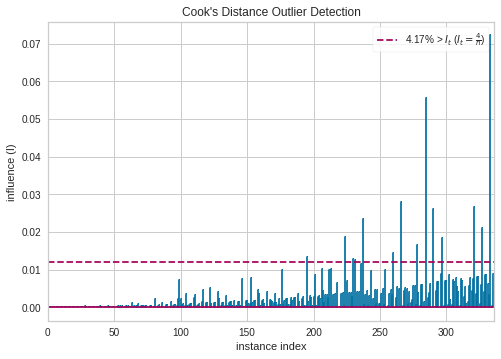

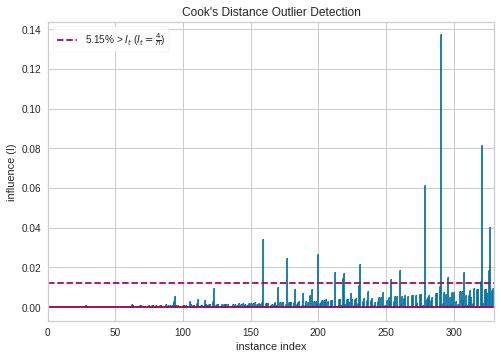

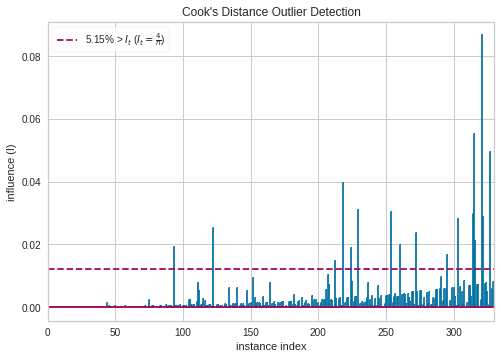

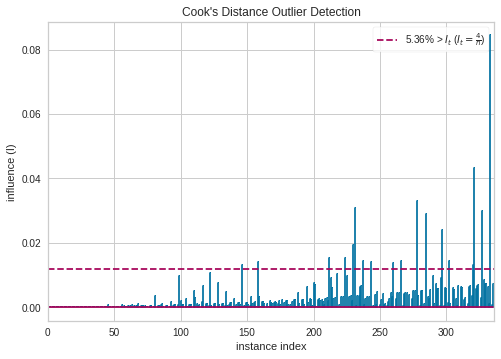

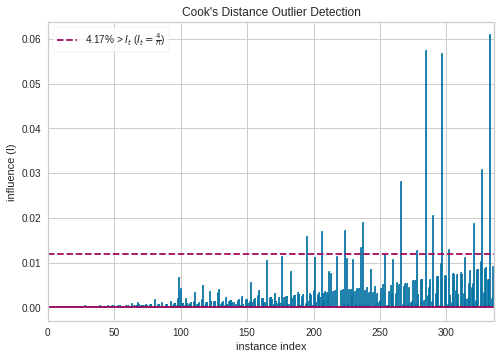

In [ ]:
path = create_dir(base_path, 'cooks-distance')
plot_cooks_distance( dict_rain_regions_yearly, 'yearly', path)
plot_cooks_distance( dict_rain_regions_monthly, 'cumulative-months', path)
plot_cooks_distance( dict_rain_regions_year_monthly, 'monthly', path)

plot_cooks_distance( dict_rain_monsoon_regions_yearly,
                    'yearly', path, 'monsoon')
plot_cooks_distance( dict_rain_monsoon_regions_monthly,
                    'cumulative-months', path, 'monsoon')
plot_cooks_distance(
     dict_rain_monsoon_regions_year_monthly, 'monthly', path, 'monsoon')